<h2>Table of Contents</h2>
<ul>
    <li><a href="#ref1">Homework2 </a></li>
    <li><a href="#ref2">Homework3 </a></li>

</ul>

## **Homework 2**

### **Pandas**

In [243]:
# Импортируем необходимые для анализа библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import math

In [244]:
# Прочитаем файл в переменную
file = r"c:\Users\admin\Desktop\kc_house_data.csv"
# присвоим его переменной "df". или любой другой понятной переменной  с помощью метода для чтения csv, 
df = pd.read_csv(file)

# Описание признаков датасета

| Переменная    | Описание                                                                                                                 |
| ------------- | ------------------------------------------------------------------------------------------------------------------------ |
| id            | Нотация для дома                                                                                                         |
| date          | дата когда было продано                                                                                                  |
| price         | Цена - это цель прогноза                                                                                                 |
| bedrooms      | Количество спален                                                                                                        |
| bathrooms     | Количество ванных комнат                                                                                                 |
| sqft_living   | Квадратные метры дома                                                                                                    |
| sqft_lot      | Квадратные метры общие                                                                                                   |
| floors        | Общие этажи (уровни) в доме                                                                                              |
| waterfront    | Дом, который имеет вид на набережную                                                                                     |
| view          | Вид из окна                                                                                                              |
| condition     | Насколько хорошим состояние в целом                                                                                      |
| grade         | Общая оценка, предоставленная Индекс от 1 до 13, где 1-3 - недостаточный уровень строительства и дизайна здания,         |
|               | 7 - средний уровень строительства и дизайна, а 11-13 - высококачественный уровень строительства и дизайна                |
| sqft_above    | Квадратные метры дома, кроме подвала                                                                                     |
| sqft_basement | Квадратные метры подвала                                                                                                 |
| yr_built      | Год постройки                                                                                                            |
| yr_renovated  | Год, когда дом был отремонтирован                                                                                        |
| zipcode       | Zip code                                                                                                                 |
| lat           | Широта координата                                                                                                        |
| long          | Координата долготы                                                                                                       |
| sqft_living15 | Кв. метры жилой площади у 15 соседей                                                                                                           |
| sqft_lot15    | Кв. метры общей площади у 15 соседей                                            |


Проверим, верно ли загрузился датасет

In [245]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


Посмотрим типы данных, количество строк, столбцов, заполенны ли ячейки

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Пустых ячеек нет, большинство данных имеют цифровой тип и поддаются анализу, **однако, формат в некоторых столбцах не логичен**, так как не может быть полторы ванной комнаты, ну или полтора этажа (наверное)

In [247]:
#Можно убедиться, просто посчитав корличество пустых ячеек, если таковые имеются
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Изменим типы данных

In [248]:
# Заменим поплавок на инт (команда эс тайп не перезаписывает исходный столбец, поэтому нужно приравнивать к исходным данным)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [249]:
# Проверим результат
df['bathrooms'].dtypes, df['floors'].dtypes

(dtype('int32'), dtype('int32'))

Посмотрим статистическое описание датасета

In [250]:
# выводим статистические характеристики с фиксированной точностью
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,1.75,2079.90,15106.97,1.45,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.73,918.44,41420.51,0.55,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.00,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.00,1910.00,7618.00,1.00,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.00,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [251]:
# или так
print(df.describe(include='all'))

                  id             date      price  bedrooms  bathrooms  \
count       21613.00            21613   21613.00  21613.00   21613.00   
unique           NaN              372        NaN       NaN        NaN   
top              NaN  20140623T000000        NaN       NaN        NaN   
freq             NaN              142        NaN       NaN        NaN   
mean   4580301520.86              NaN  540088.14      3.37       1.75   
std    2876565571.31              NaN  367127.20      0.93       0.73   
min       1000102.00              NaN   75000.00      0.00       0.00   
25%    2123049194.00              NaN  321950.00      3.00       1.00   
50%    3904930410.00              NaN  450000.00      3.00       2.00   
75%    7308900445.00              NaN  645000.00      4.00       2.00   
max    9900000190.00              NaN 7700000.00     33.00       8.00   

        sqft_living   sqft_lot   floors  waterfront     view  ...    grade  \
count      21613.00   21613.00 21613.00    21

In [252]:
# еще раз ознакомимся с форматом данных в нашей таблице для их стандартизации, нормализации и тп
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639


Исправим формат даты

In [253]:
# положим в датафрейм столбца дата новый формат этой самой даты с помощью конвертации его в более понятный формат 
# с помощью to_datetame() столбец.
df['date'] = pd.to_datetime(df.date)
# print (df)
df[['date']].head()

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


Нули в колонках фактически имеют смысл - что данных нет, либо что то отсутствует, например дом не ремонтировался. при некоторых вариантах анализа это сильно исказит данные. исправим, заменяя их на nan

In [254]:
import numpy as np
df = df.replace(0, np.NaN)

In [255]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,6,770,NaN,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,7,1050,910.00,1965,NaN,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,8,1680,NaN,1987,NaN,98074,47.62,-122.05,1800,7503


**Ответьте на несколько вопросов**

3.1 В каком диапазоне изменяются стоимости недвижимости?


для этого  мы можем посмотреть статистическое описание столбца и оценить параметры от мин до макс, в том числе, можно визуализировать эти данные

In [256]:
df['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

Обычно для визуализации таких данных использую барплоты, но выглядит сейчас это отвратительно, так как сильныйй раздрос цен между квартилями  и мин и макс

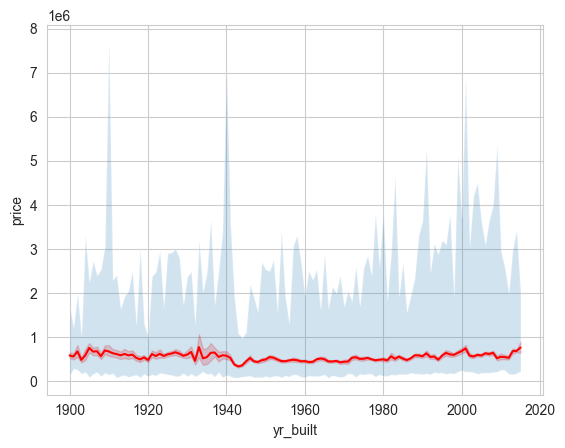

In [257]:
# Группировка данных по году постройки и вычисление минимального и максимального значения цены в каждой группе
price_range = df.groupby('yr_built')['price'].agg(['min', 'max'])

# Создание линейного графика
sns.lineplot(data=df, x="yr_built", y="price", color="r")

# Отображение диапазона на графике
plt.fill_between(price_range.index, price_range['min'], price_range['max'], alpha=0.2)

# Отображение графика
plt.show()

3.2 Какую долю в среднем занимают жилая площадь от всей площади по всем домам?


Для решения этой задачи, общую площадь разделим на жилую и найдем среднбюю, отформатируем в процентах. так же, визуализируем

Средняя доля жилой площади от общей площади по всем домам: 32.37%


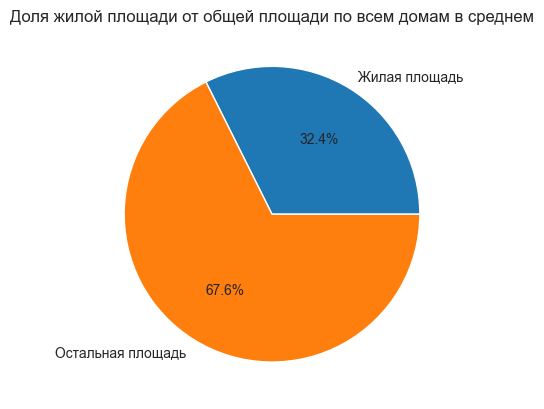

In [258]:
living_area_ratio = (df['sqft_living'] / df['sqft_lot']).mean()

# Вывод результата
print("Средняя доля жилой площади от общей площади по всем домам: {:.2%}".format(living_area_ratio))
#  Вычисление доли оставшейся площади
other_area_ratio = 1 - living_area_ratio

# Создание списка долей для круговой диаграммы
ratios = [living_area_ratio, other_area_ratio]

# Создание списка меток для круговой диаграммы
labels = ['Жилая площадь', 'Остальная площадь']

# Создание круговой диаграммы
plt.pie(ratios, labels=labels, autopct='%1.1f%%')

# Добавление заголовка
plt.title('Доля жилой площади от общей площади по всем домам в среднем')

# Отображение диаграммы
plt.show()
#

3.3 Как много домов с разными этажами в данных?


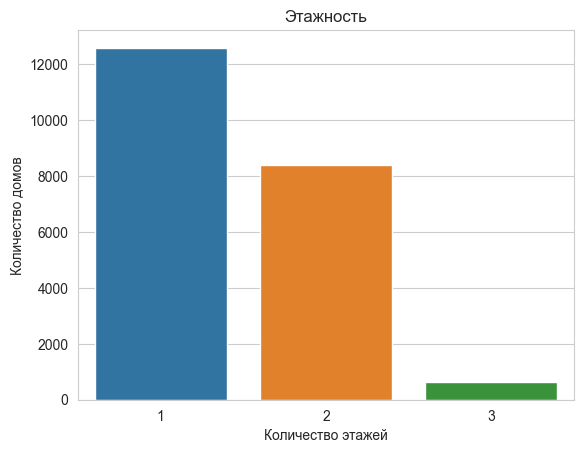

In [259]:
# Для решения этой задачи, нам необходимо группировать данные по этажам и посчитать сколько таких домов с помощью value count
count_floors = df['floors'].value_counts()
sns.barplot(x=count_floors.index, y=count_floors.values)
# добавляем подписи осей
plt.title("Этажность")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

Как мы видим, в выборке в основном одноэтажные и двухэтажные дома

3.4 Насколько хорошие состояния у домов в данных?

Для этого обратимся к столбцу condition, и просмотрим, какие вообще существуют состояния домов

In [260]:
count_condition = df['condition'].value_counts()

Итак, у нас есть 5 оценок состояний домов, возможно 1 - это плохой дом, 5 это отличное состояние жилого дома. Вопрос насколько хорошо это или плохо, буду воспринимать следующим образом:
насколько много домов выше 3, ибо это самое с=частое состояние домов

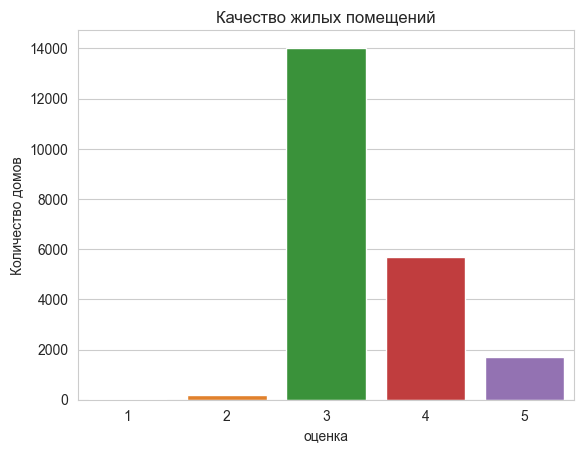

In [261]:
sns.barplot(x=count_condition.index, y=count_condition.values)

# добавляем подписи осей
plt.title("Качество жилых помещений")
plt.xlabel('оценка')
plt.ylabel('Количество домов')
plt.show()

Судя по всему домов в хорошем состоянии не так много, в целом, качество близится к среднему. интересно, как это связано с их ремонтом возможно их не чинили

In [262]:
# Итак, отфильтруем датасет так чтобы были только отремонтированные дома 
reinovated_df = df.loc[df['yr_renovated'].notnull()]
reinovated_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
35,9547205180,2014-06-13,696000.00,3.00,2.00,2300,3060,1,NaN,NaN,...,8,1510,790.00,1930,2002.00,98115,47.68,-122.31,1590,3264
95,1483300570,2014-09-08,905000.00,4.00,2.00,3300,10250,1,NaN,NaN,...,7,2390,910.00,1946,1991.00,98040,47.59,-122.25,1950,6045
103,2450000295,2014-10-07,1088000.00,3.00,2.00,2920,8113,2,NaN,NaN,...,8,2920,NaN,1950,2010.00,98004,47.58,-122.20,2370,8113
115,3626039325,2014-11-21,740500.00,3.00,3.00,4380,6350,2,NaN,NaN,...,8,2780,1600.00,1900,1999.00,98117,47.70,-122.37,1830,6350


In [263]:
df_not_reinovated = df.loc[df['yr_renovated'].isnull()]
df_not_reinovated.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,98178,47.51,-122.26,1340,5650
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,6,770,NaN,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,7,1050,910.00,1965,NaN,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,8,1680,NaN,1987,NaN,98074,47.62,-122.05,1800,7503
5,7237550310,2014-05-12,1225000.00,4.00,4.00,5420,101930,1,NaN,NaN,...,11,3890,1530.00,2001,NaN,98053,47.66,-122.00,4760,101930


In [264]:
# Посмотрим теперь как дело обстоит с оценками их качества
count_condition_reinnovated = reinovated_df['condition'].value_counts()
count_condition_reinnovated

3    736
4    136
5     37
2      4
1      1
Name: condition, dtype: int64

In [265]:
# Посмотрим теперь как дело обстоит с оценками их качества
count_condition_not_reinnovated = df_not_reinovated['condition'].value_counts()
count_condition_not_reinnovated

3    13295
4     5543
5     1664
2      168
1       29
Name: condition, dtype: int64

Домов без реновации и с оценками 4 и 5: 7207
Домов после реновации и с оценками 4 и 5: 173


C:\Users\admin\AppData\Local\Temp/ipykernel_7212/2067696214.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reinovated = reinovated_df[df['condition'].isin([4, 5])]
C:\Users\admin\AppData\Local\Temp/ipykernel_7212/2067696214.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_reinovated = df_not_reinovated[df['condition'].isin([4, 5])]


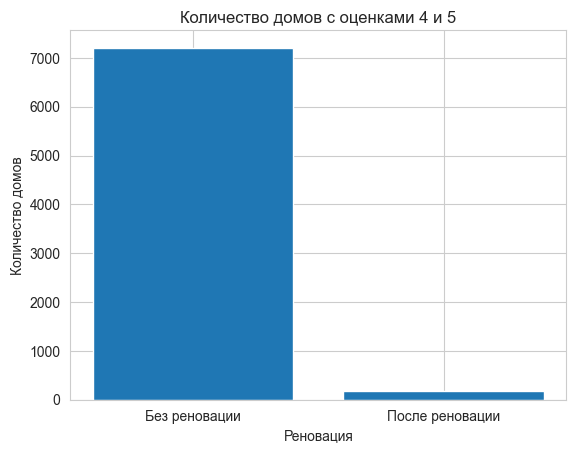

In [266]:
# Фильтруем дома, которые были реновированы и имеют оценки 4 и 5
reinovated = reinovated_df[df['condition'].isin([4, 5])]
no_reinovated = df_not_reinovated[df['condition'].isin([4, 5])]
# Считаем количество домов в каждой категории
no_renovation_count = len(no_reinovated)
renovated_count = len(reinovated)

# Выводим результаты
print(f'Домов без реновации и с оценками 4 и 5: {no_renovation_count}')
print(f'Домов после реновации и с оценками 4 и 5: {renovated_count}')

# Строим столбчатую диаграмму
plt.bar(['Без реновации', 'После реновации'], [no_renovation_count, renovated_count])
plt.title('Количество домов с оценками 4 и 5')
plt.xlabel('Реновация')
plt.ylabel('Количество домов')
plt.show()

#### Сравним данные в процентном соотношении

In [267]:
total_count_not_reinovated = len(df_not_reinovated)
# Считаем процентное соотношение
no_renovation_percent = no_renovation_count / total_count_not_reinovated
print(total_count_not_reinovated)
print("Доля домов с оценками 4 и 5 в общем количестве домов без реинновации: {:.2%}".format(no_renovation_percent))

20699
Доля домов с оценками 4 и 5 в общем количестве домов без реинновации: 34.82%


In [268]:
total_count_reinnov = len(reinovated_df)
# Считаем процентное соотношение
renovation_percent = renovated_count / total_count_reinnov
print(total_count_reinnov)
print("Доля домов с оценками 4 и 5 в общем количестве домов после реинновации: {:.2%}".format(renovation_percent))

914
Доля домов с оценками 4 и 5 в общем количестве домов после реинновации: 18.93%


In [269]:
count_houses = len(df)
count_houses

21613

Странная история, видимо реинновация не идет на пользу недвижимости))

In [270]:
total_good_cond = sum(df['condition'].isin([4, 5]))
total_good_cond

7380

In [271]:
med_condition = sum(df['condition']== 3)
med_condition

14031

In [272]:
good_condition = total_good_cond/count_houses
print("Доля домов с оценками 4 и 5 в общем количестве домов: {:.2%}".format(good_condition))

Доля домов с оценками 4 и 5 в общем количестве домов: 34.15%


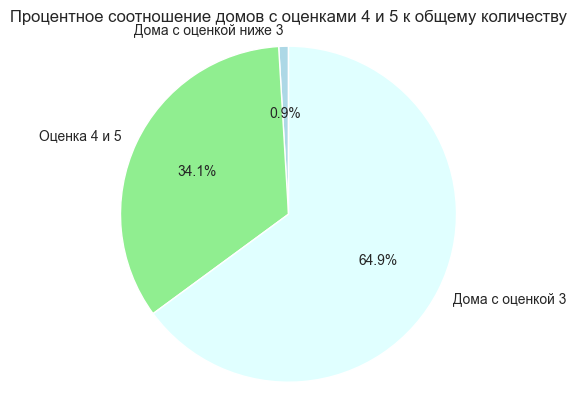

In [273]:
# Строим круговую диаграмму
labels = ['Дома с оценкой ниже 3', 'Оценка 4 и 5','Дома с оценкой 3']
sizes = [count_houses - (total_good_cond + med_condition), total_good_cond, med_condition ]
colors = ['lightblue', 'lightgreen', 'lightcyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Процентное соотношение домов с оценками 4 и 5 к общему количеству')
plt.show()

В целом, состояние домов в среднем имеет оценку 3, хороших домов только треть, к тому же, после реинновации, почему то оценки домов падают) 

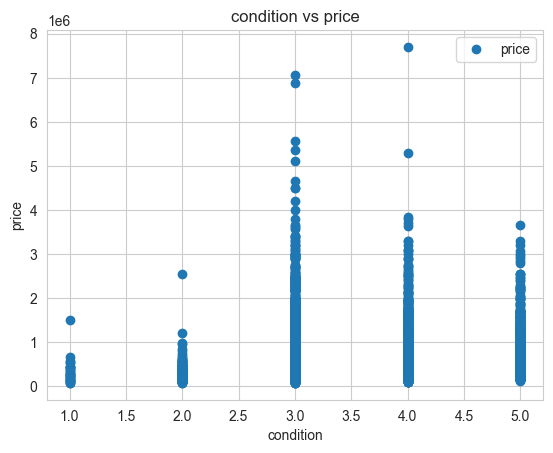

,condition,price
condition,1.00,0.04
price,0.04,1.00


In [274]:
df.plot(x='condition', y='price', style='o')
plt.title('condition vs price')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()
df[['condition','price']].corr()

3.5 Найдите год, когда построили первый дом, когда построили последний дом в данных?

In [275]:
sorted_data = df.sort_values('yr_built', ascending = False)
sorted_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21369,923059259,2015-04-01,455950.00,4.00,2.00,2720,5771,2,NaN,NaN,...,8,2720,NaN,2015,NaN,98056,47.49,-122.17,1940,4184
1763,1832100030,2014-06-25,597326.00,4.00,4.00,3570,8250,2,NaN,NaN,...,10,2860,710.00,2015,NaN,98040,47.58,-122.23,2230,10000
21262,5694500840,2014-11-25,559000.00,2.00,3.00,1650,960,3,NaN,NaN,...,8,1350,300.00,2015,NaN,98103,47.66,-122.35,1650,3000


In [276]:
sorted_data = df.sort_values('yr_built', ascending = True)
sorted_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4697,9126101645,2014-06-10,558000.00,4.00,2.00,2180,3870,1,NaN,NaN,...,7,1020,1160.00,1900,NaN,98122,47.61,-122.30,1520,2580
2961,1947300115,2014-06-19,464000.00,3.00,1.00,1320,3625,2,NaN,NaN,...,7,1320,NaN,1900,NaN,98122,47.60,-122.29,1660,5438
12369,9138100350,2015-02-18,685000.00,4.00,2.00,2290,6000,1,NaN,3.00,...,7,2290,NaN,1900,NaN,98115,47.68,-122.32,2000,3150


In [277]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_7212/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,-0.00,-0.01,-0.13,0.02,NaN,0.01,-0.02,0.01,-0.01,-0.02,0.02,0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.51,0.70,0.09,0.24,NaN,0.30,0.04,0.67,0.61,0.41,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.46,0.58,0.03,0.16,NaN,0.04,0.03,0.36,0.48,0.43,0.16,0.16,-0.15,-0.01,0.13,0.39,0.03
bathrooms,-0.00,0.51,0.46,1.00,0.70,0.09,0.49,NaN,0.15,-0.13,0.60,0.64,0.36,0.43,0.22,-0.16,0.03,0.18,0.51,0.08
sqft_living,-0.01,0.70,0.58,0.70,1.00,0.17,0.35,NaN,0.21,-0.06,0.76,0.88,0.72,0.32,0.14,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,NaN,0.06,-0.01,0.11,0.18,0.16,0.05,-0.07,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.24,0.16,0.49,0.35,-0.01,1.00,NaN,0.10,-0.29,0.47,0.52,-0.10,0.58,0.05,-0.10,0.03,0.16,0.30,-0.01
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.01,0.30,0.04,0.15,0.21,0.06,0.10,NaN,1.00,0.02,0.22,0.18,0.21,0.04,-0.09,0.00,-0.03,0.03,0.20,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.29,NaN,0.02,1.00,-0.14,-0.16,0.16,-0.36,-0.37,0.00,-0.01,-0.11,-0.09,-0.00


In [278]:
# посмотрим от чего же в наибольшей степени зависит цена
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7212/3715882859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.51
Name: price, dtype: float64

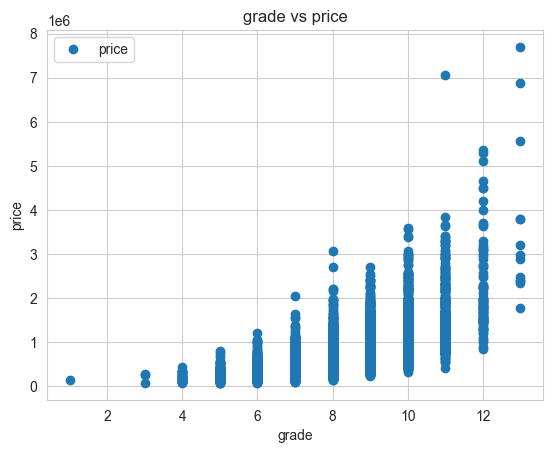

,grade,price
grade,1.00,0.67
price,0.67,1.00


In [279]:
df.plot(x='grade', y='price', style='o')
plt.title('grade vs price')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
df[['grade','price']].corr()

**Условие 4: 4 задача**
4.1 Сколько в среднем стоят дома, у которых 2 спальни?


In [280]:
two_bedrooms = df.loc[df['bedrooms'] == 2]
mean_price = two_bedrooms['price'].mean()
mean_price

401372.681884058

In [281]:
mean_price_1 = df.query('bedrooms == 2')['price'].mean()
mean_price_1


401372.681884058

4.2 Какая в среднем общая площадь домов, у которых стоимость больше 600 000?


In [282]:
mean_sqft = round(df.query('price < 600000')['sqft_above'].mean())

mean_sqft

1518

In [283]:
high_price = df.loc[df['price'] < 600000]
mean_sqft_1 = round(high_price['sqft_above'].mean())
mean_sqft_1

1518

4.3 Как много домов коснулся ремонт?


In [284]:
# Итак, отфильтруем датасет так чтобы были только отремонтированные дома 
reinovated_df = df.loc[df['yr_renovated'].notnull()]
print(len(reinovated_df))

914


4.4 Насколько в среднем стоимость домов с оценкой grade домов выше 10 отличается от стоимости домов с оценкой grade меньше 4?


In [285]:
high_grade = df.loc[df['grade'] > 10]
high_grade.sort_values('grade',ascending=False).head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.00,6.00,8.00,12050,27600,2,NaN,3.00,...,13,8570,3480.00,1910,1987.00,98102,47.63,-122.32,3940,8800
5451,7237501190,2014-10-10,1780000.00,4.00,3.00,4890,13402,2,NaN,NaN,...,13,4890,NaN,2004,NaN,98059,47.53,-122.13,5790,13539
13700,4139900180,2015-04-20,2340000.00,4.00,2.00,4500,35200,1,NaN,NaN,...,13,4500,NaN,1988,NaN,98006,47.55,-122.13,4760,35200
7907,1068000375,2014-09-23,3200000.00,6.00,5.00,7100,18200,2,NaN,NaN,...,13,5240,1860.00,1933,2002.00,98199,47.64,-122.41,3130,6477
4811,9831200500,2015-03-04,2479000.00,5.00,3.00,6810,7500,2,NaN,NaN,...,13,6110,700.00,1922,NaN,98102,47.63,-122.32,2660,7500


In [286]:
mean_price_high = high_grade['price'].mean().round()
mean_price_high

1678635.0

In [287]:
low_grade = df.loc[df['grade'] < 4]
low_grade.sort_values('grade',ascending=True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,2014-09-26,142000.00,NaN,NaN,290,20875,1,NaN,NaN,...,1,290,NaN,1963,NaN,98024,47.53,-121.89,1620,22850
1149,3421079032,2015-02-17,75000.00,1.00,NaN,670,43377,1,NaN,NaN,...,3,670,NaN,1966,NaN,98022,47.26,-121.91,1160,42882
3223,2420069251,2015-02-25,262000.00,1.00,NaN,520,12981,1,NaN,NaN,...,3,520,NaN,1920,NaN,98022,47.21,-122.00,1340,12233
5832,5702500050,2014-11-04,280000.00,1.00,NaN,600,24501,1,NaN,NaN,...,3,600,NaN,1950,NaN,98045,47.53,-121.75,990,22549


In [288]:
mean_price_low = low_grade['price'].mean().round()
mean_price_low

189750.0

In [289]:
# вычисление разницы между средними значениями
diff = mean_price_high - mean_price_low

print('Средняя стоимость домов high_grade выше на', diff)

Средняя стоимость домов high_grade выше на 1488885.0


<Axes: xlabel='grade', ylabel='price'>

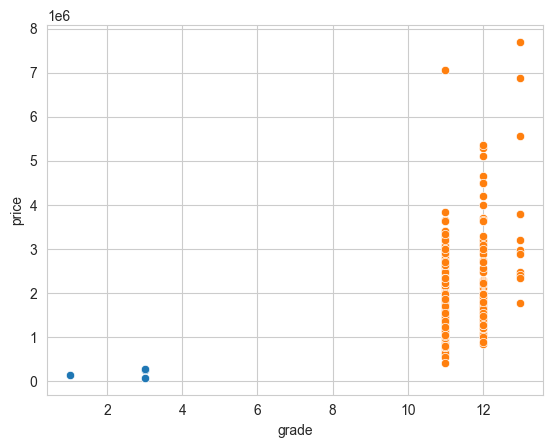

In [290]:


sns.scatterplot(data = low_grade, x = "grade", y = "price")
sns.scatterplot(data = high_grade, x = "grade", y = "price")

## Условие 5: 5 задача


In [291]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21600.00,21527.00,21613.00,21613.00,21613.00,163.00,2124.00,21613.00,21613.00,21613.00,8487.00,21613.00,914.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,1.76,2079.90,15106.97,1.45,1.00,2.38,3.41,7.66,1788.39,742.36,1971.01,1995.83,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.73,918.44,41420.51,0.55,0.00,0.92,0.65,1.18,828.09,405.11,29.37,15.52,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,1.00,1.00,290.00,520.00,1.00,1.00,1.00,1.00,1.00,290.00,10.00,1900.00,1934.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.00,1427.00,5040.00,1.00,1.00,2.00,3.00,7.00,1190.00,450.00,1951.00,1987.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.00,1910.00,7618.00,1.00,1.00,2.00,3.00,7.00,1560.00,700.00,1975.00,2000.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.00,2550.00,10688.00,2.00,1.00,3.00,4.00,8.00,2210.00,980.00,1997.00,2007.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


5.1 Выберите дом клиенту
Клиент хочет дом с видом на набережную, как минимум с тремя ванными и с подвалом. Сколько вариантов есть у клиента?


In [292]:
house1 = df[
    (df['waterfront'].notnull()) &
    (df['bathrooms'] >= 3) &
    (df['sqft_basement'].notnull())
]
house1.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
300,3225069065,2014-06-24,3075000.00,4.00,5.00,4550,18641,1,1.00,4.00,...,10,2600,1950.00,2002,NaN,98074,47.61,-122.08,4550,19508
457,2122039094,2014-11-26,705000.00,3.00,3.00,1970,20978,2,1.00,3.00,...,9,1770,200.00,1980,NaN,98070,47.38,-122.44,2280,75396
1164,1247600105,2014-10-20,5110800.00,5.00,5.00,8010,45517,2,1.00,4.00,...,12,5990,2020.00,1999,NaN,98033,47.68,-122.21,3430,26788
1261,7636800041,2014-06-25,995000.00,3.00,4.00,4380,47044,2,1.00,3.00,...,9,3720,660.00,1968,1990.00,98166,47.47,-122.36,2460,18512
1315,7558700030,2015-04-13,5300000.00,6.00,6.00,7390,24829,2,1.00,4.00,...,12,5000,2390.00,1991,NaN,98040,47.56,-122.21,4320,24619


In [293]:
print(len(house1))


41


5.2 Выберите дом клиенту
Клиент хочет дом либо с очень красивым видом из окна, либо с видом на набережную, в очень хорошем состоянии и год постройки не меньше 1980 года. В какой ценовом диапазоне будут дома?


In [294]:
# посмотрим что такое 'очень красиво'
very_beautiful = df['view'].max()
f'Очень красиво, вероятнее всего = {very_beautiful}'

'Очень красиво, вероятнее всего = 4.0'

In [295]:
house2 = df[
    (df['waterfront'].notnull())|
    (df['view'] == very_beautiful) &
    (df['condition'] < 4) &
    (df['yr_built'] > 1980) 
]
house2.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000.00,3.00,2.00,2753,65005,1,1.00,2.00,...,9,2165,588.00,1953,NaN,98070,47.40,-122.45,2680,72513
230,8096000060,2015-04-13,655000.00,2.00,1.00,1450,15798,2,1.00,4.00,...,7,1230,220.00,1915,1978.00,98166,47.45,-122.38,2030,13193
246,2025069065,2014-09-29,2400000.00,4.00,2.00,3650,8354,1,1.00,4.00,...,9,1830,1820.00,2000,NaN,98074,47.63,-122.07,3120,18841
264,2123039032,2014-10-27,369900.00,1.00,NaN,760,10079,1,1.00,4.00,...,5,760,NaN,1936,NaN,98070,47.47,-122.44,1230,14267
300,3225069065,2014-06-24,3075000.00,4.00,5.00,4550,18641,1,1.00,4.00,...,10,2600,1950.00,2002,NaN,98074,47.61,-122.08,4550,19508


In [296]:
house2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,215.00,215.00,215.00,209.00,215.00,215.00,215.00,163.00,215.00,215.00,215.00,215.00,136.00,215.00,42.00,215.00,215.00,215.00,215.00,215.00
mean,4712855515.07,1617017.61,3.47,2.51,3436.05,28210.49,1.64,1.00,3.82,3.40,9.13,2668.68,1213.12,1970.62,1988.57,98089.53,47.55,-122.26,2802.67,22387.55
std,2954961415.89,1140462.74,1.10,1.19,1806.69,52143.73,0.62,0.00,0.50,0.68,1.78,1398.73,725.86,28.81,12.44,59.38,0.12,0.15,889.42,26707.66
min,98001070.00,285000.00,1.00,1.00,440.00,1171.00,1.00,1.00,1.00,1.00,5.00,440.00,100.00,1903.00,1958.00,98001.00,47.25,-122.51,750.00,1505.00
25%,2122539063.00,772500.00,3.00,2.00,2165.00,10070.00,1.00,1.00,4.00,3.00,8.00,1730.00,800.00,1948.50,1984.25,98040.00,47.46,-122.38,2240.00,10257.50
50%,4055701200.00,1310000.00,3.00,2.00,3110.00,16387.00,2.00,1.00,4.00,3.00,9.00,2400.00,1075.00,1976.00,1990.00,98074.00,47.56,-122.26,2760.00,14810.00
75%,7631800062.50,2025000.00,4.00,3.00,4325.00,25472.00,2.00,1.00,4.00,4.00,10.00,3255.00,1570.00,1996.00,1997.75,98145.00,47.63,-122.19,3390.00,23503.00
max,9808700762.00,7062500.00,7.00,8.00,13540.00,505166.00,3.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2014.00,2009.00,98199.00,47.77,-121.74,5380.00,217800.00


In [297]:
print(f"Ценовой диапазон на такую недвижимость от {house2['price'].min()} и до {house2['price'].max()}")

Ценовой диапазон на такую недвижимость от 285000.0 и до 7062500.0


5.3 Выберите дом клиенту
Клиент хочет дом без подвала, с двумя этажами, стоимостью до 150000. Какая оценка по состоянию у таких домов в среднем?

In [298]:
house3 = df[
    (df['price'] < 150000)&
    (df['floors'] == 2) &
    (df['sqft_basement'].isnull())
]
house3.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2589,5061300030,2014-05-08,134000.00,2.00,1.00,980,5000,2,NaN,NaN,...,7,980,NaN,1922,2003.00,98014,47.71,-121.36,1040,5000
10105,5466310060,2015-03-24,139500.00,2.00,1.00,1230,1561,2,NaN,NaN,...,7,1230,NaN,1983,NaN,98042,47.38,-122.15,1660,2243
15610,7614100080,2015-02-11,140000.00,3.00,1.00,1270,8991,2,NaN,NaN,...,7,1270,NaN,1981,NaN,98042,47.36,-122.15,1270,8993
18332,9272202260,2014-09-24,130000.00,3.00,1.00,1200,7000,2,NaN,NaN,...,7,1200,NaN,1908,NaN,98116,47.59,-122.38,3290,6000
18939,4239400300,2014-11-29,90000.00,3.00,1.00,980,2490,2,NaN,NaN,...,6,980,NaN,1969,NaN,98092,47.32,-122.18,980,3154


In [299]:
mean_condition = round(house3['condition'].mean())
print(f"Такие дома в среднем имеют оценку {mean_condition}")

Такие дома в среднем имеют оценку 3


<h2 id="ref2">УРОК 3</h2>



### Условие 1. Задача 1

1.2 Создать новый признак delta_renovated, который будет содержать **разницу в годах между годом реновацией дома и годом постройки дома**

Если реновации дома не было, то в новом признаке поставьте 0 (я оставлю NAN)
Для того чтобы поставить 0 вместо NaN можно использовать метод replace(np.NaN,0)


In [300]:
df['delta_renovated'] = df['yr_renovated']-df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,1180,NaN,1955,NaN,98178,47.51,-122.26,1340,5650,NaN
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639,40.00
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,770,NaN,1933,NaN,98028,47.74,-122.23,2720,8062,NaN
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,1050,910.00,1965,NaN,98136,47.52,-122.39,1360,5000,NaN
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,1680,NaN,1987,NaN,98074,47.62,-122.05,1800,7503,NaN


1.3 Создайте **признаки года продажи, месяца продажи**

In [301]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,1955,NaN,98178,47.51,-122.26,1340,5650,NaN,2014,10
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,1951,1991.00,98125,47.72,-122.32,1690,7639,40.00,2014,12
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,1933,NaN,98028,47.74,-122.23,2720,8062,NaN,2015,2
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,1965,NaN,98136,47.52,-122.39,1360,5000,NaN,2014,12
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,1987,NaN,98074,47.62,-122.05,1800,7503,NaN,2015,2


1.4 Удалите признаки date, zipcode, lat, long


In [302]:

df = df.drop(['zipcode', 'lat', 'long'], axis=1)

In [303]:

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,1340,5650,NaN,2014,10
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,7,2170,400.00,1951,1991.00,1690,7639,40.00,2014,12
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,6,770,NaN,1933,NaN,2720,8062,NaN,2015,2
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,7,1050,910.00,1965,NaN,1360,5000,NaN,2014,12
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,8,1680,NaN,1987,NaN,1800,7503,NaN,2015,2


## Условие 2: 2 задача


### 2.1 Создайте датафрейм с клиентами:

<code>clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
5083000375, 7920100025, 1951600150, 809001400, 339600110,
1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
8861700030, 3303980210, 7731100066, 8146100580, 825069097,
3889100029, 9524100196]
})</code>

In [304]:
clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
5083000375, 7920100025, 1951600150, 809001400, 339600110,
1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
8861700030, 3303980210, 7731100066, 8146100580, 825069097,
3889100029, 9524100196]})

### 2.1 Присоедините к таблице clients данные по домам через метод join

In [305]:
clients_join = clients.join(df.set_index('id'), on = 'house_id')
clients_join.head()

,client_id,house_id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,1459,8965450190,2015-02-18,295000.00,3.00,2.00,1500,3060,2,NaN,...,7,1500,NaN,1994,NaN,2700,7734,NaN,2015,2
1,4684,6823100225,2015-04-14,700000.00,4.00,1.00,1870,6000,1,NaN,...,8,1670,200.00,1949,NaN,1710,6000,NaN,2015,4
2,3498,5104540330,2015-05-08,679000.00,4.00,2.00,3680,7236,2,NaN,...,10,3680,NaN,2006,NaN,3310,7180,NaN,2015,5
3,3942,2131701075,2014-12-04,420000.00,3.00,1.00,1720,5000,1,NaN,...,8,1720,NaN,1932,2009.00,1410,8300,77.00,2014,12
4,4535,1522700060,2014-06-24,518000.00,4.00,2.00,2520,14021,2,NaN,...,9,2520,NaN,1999,NaN,2330,14007,NaN,2014,6


### 2.2 Присоедините к таблице clients данные по домам через метод merge

In [306]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,1340,5650,NaN,2014,10
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,7,2170,400.00,1951,1991.00,1690,7639,40.00,2014,12
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,6,770,NaN,1933,NaN,2720,8062,NaN,2015,2
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,7,1050,910.00,1965,NaN,1360,5000,NaN,2014,12
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,8,1680,NaN,1987,NaN,1800,7503,NaN,2015,2


* *Это нужно, чтобы понимать, какие дома покупались клиентами
house_id - это индексы датафрейма с домами*

In [307]:
merged_df = clients.merge(df, left_on='house_id', right_on='id')
merged_df.drop('id', axis=1, inplace=True)
merged_df.head()


,client_id,house_id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,1459,8965450190,2015-02-18,295000.00,3.00,2.00,1500,3060,2,NaN,...,7,1500,NaN,1994,NaN,2700,7734,NaN,2015,2
1,4684,6823100225,2015-04-14,700000.00,4.00,1.00,1870,6000,1,NaN,...,8,1670,200.00,1949,NaN,1710,6000,NaN,2015,4
2,3498,5104540330,2015-05-08,679000.00,4.00,2.00,3680,7236,2,NaN,...,10,3680,NaN,2006,NaN,3310,7180,NaN,2015,5
3,3942,2131701075,2014-12-04,420000.00,3.00,1.00,1720,5000,1,NaN,...,8,1720,NaN,1932,2009.00,1410,8300,77.00,2014,12
4,4535,1522700060,2014-06-24,518000.00,4.00,2.00,2520,14021,2,NaN,...,9,2520,NaN,1999,NaN,2330,14007,NaN,2014,6


## Условие 3: 3 задача (сводные таблицы)

In [308]:
df['bedrooms'].describe()

count   21600.00
mean        3.37
std         0.93
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64

### 3.1 Найдите среднюю стоимость домов в зависимости от количества спален
Отсортируйте от меньшей стоимости к большей

In [309]:
# группируем данные по количеству спален и находим среднюю стоимость
mean_prices = df.groupby('bedrooms')['price'].mean()

In [310]:
# сортируем данные по возрастанию стоимости
sorted_prices = mean_prices.sort_values()

In [311]:
sorted_prices

bedrooms
1.00     317642.88
2.00     401372.68
3.00     466232.08
11.00    520000.00
4.00     635419.50
33.00    640000.00
5.00     786599.83
10.00    819333.33
6.00     825520.64
9.00     893999.83
7.00     951184.66
8.00    1105076.92
Name: price, dtype: float64

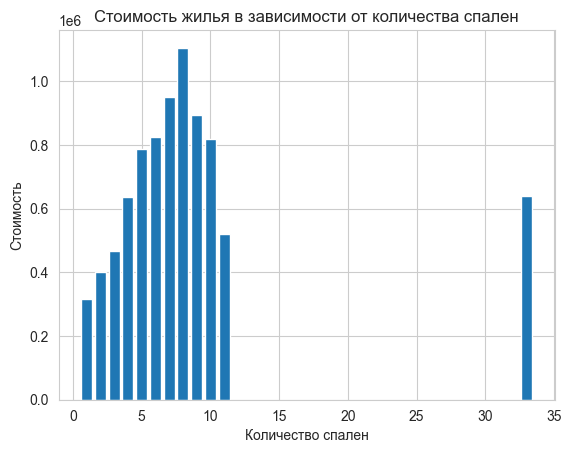

In [312]:
# создаем барплот
plt.bar(sorted_prices.index, sorted_prices.values)

# добавляем заголовок и метки осей
plt.title('Стоимость жилья в зависимости от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Стоимость')

# показываем график
plt.show()

### 3.2 Найдите минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома

In [313]:
grouped_prices = df.groupby('condition')['price'].agg(['min', 'mean', 'max'])
grouped_prices

,min,mean,max
condition,,,
1,78000.00,334431.67,1500000.00
2,80000.00,327287.15,2555000.00
3,75000.00,542012.58,7062500.00
4,89000.00,521200.39,7700000.00
5,110000.00,612418.09,3650000.00


### 3.3 Постройте таблицу с подсчетом количества домов в данных в зависимости от вида на набережную и оценкой вида

In [314]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,1340,5650,NaN,2014,10


In [315]:
df['waterfront'] = df['waterfront'].replace(np.NaN,0)


In [316]:
# группируем данные по виду на набережную и оценке вида и находим количество строк в каждой группе
grouped_data_waterfront = df.groupby(['waterfront', 'view']).size().reset_index(name='количество')
grouped_data_waterfront


,waterfront,view,количество
0,0.00,1.00,331
1,0.00,2.00,955
2,0.00,3.00,491
3,0.00,4.00,184
4,1.00,1.00,1
5,1.00,2.00,8
6,1.00,3.00,19
7,1.00,4.00,135


### 3.4 Каких домов в зависимости от этажности и количества спален больше?

In [317]:
grouped_data_floors = df.groupby(['floors', 'bedrooms']).size().reset_index(name='Количество')
max_count = grouped_data_floors.loc[grouped_data_floors['Количество'] == grouped_data_floors['Количество'].max()]

In [318]:
max_count

,floors,bedrooms,Количество
2,1,3.00,6241


### 3.5 Постройте таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома

In [319]:
grouped_data_cond = df.groupby(['condition', 'grade'])['price'].mean().reset_index(name='Средняя цена')
grouped_data_cond.sort_values('Средняя цена')

,condition,grade,Средняя цена
14,3,3,75000.00
0,1,1,142000.00
1,1,4,150000.00
7,2,4,179600.00
8,2,5,206166.67
15,3,4,210000.00
25,4,4,243905.00
26,4,5,245299.01
16,3,5,246993.46
35,5,3,262000.00


## Условие 1: Задача 1

1.1. Скачать следующие данные: kc-house-data


In [320]:
file = r"c:\Users\admin\Desktop\kc_house_data.csv"
df = pd.read_csv(file)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


1.2. Изучите стоимости недвижимости

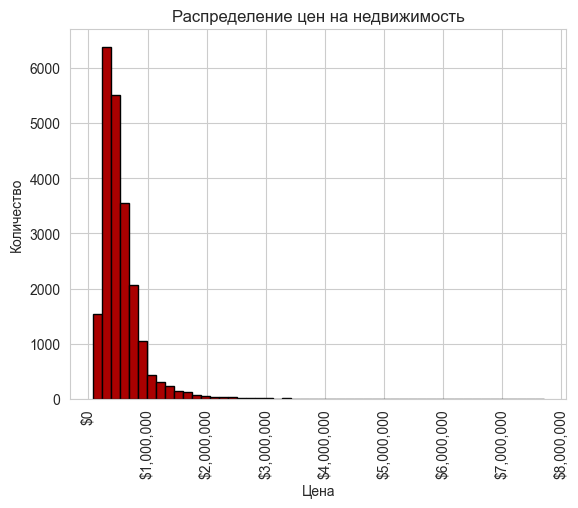

In [321]:
import matplotlib.ticker as mtick

# создание гистограммы распределения цен
fig, ax = plt.subplots()
ax.hist(df['price'], bins=50,color='#AA0000', edgecolor='black')
ax.set_xlabel('Цена')
ax.set_ylabel('Количество')
ax.set_title('Распределение цен на недвижимость')

# форматирование оси y в долларах
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.xticks(rotation=90)
plt.show()

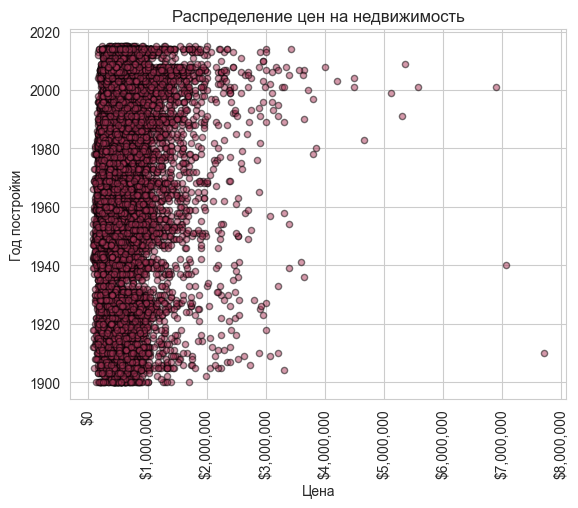

In [322]:
# В целом, не важно какой столбец сейчас соотн6осить к цене, я хотела увидеть точечный график, где видно, что несколько домов сильно выбиваются 
# из среднестатистических цен и вообьще дома более 4 млн - это большая редкость. в основном это цены до 1.5 млн
fig, ax = plt.subplots()
ax.scatter(df['price'], df['yr_built'], s=20, alpha=0.5, color='#AA3456', edgecolor='black')
ax.set_xlabel('Цена')
ax.set_ylabel('Год постройки')
ax.set_title('Распределение цен на недвижимость')

# форматирование оси x в долларах
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.xticks(rotation=90)

plt.show()

In [323]:
df['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64


Значение std говорит о том, что цены на недвижимость в датасете имеют большой разброс. Стандартное отклонение показывает, насколько разбросаны цены относительно средней цены. В данном случае, стандартное отклонение равно 367127.20, что говорит о том, что цены на недвижимость в датасете могут значительно отличаться от средней цены. 

Попробуем убрать выбросы

1. q1 = df['price'].quantile(0.25) - здесь мы вычисляем первый квартиль (25-й процентиль) для столбца 'price' в нашем DataFrame df.

2. q3 = df['price'].quantile(0.75) - здесь мы вычисляем третий квартиль (75-й процентиль) для столбца 'price' в нашем DataFrame df.

3. iqr = q3 - q1 - здесь мы вычисляем межквартильный размах (IQR) для столбца 'price' в нашем DataFrame df.

4. lower_bound = q1 - 1.5 * iqr - здесь мы вычисляем нижнюю границу интервала без выбросов, используя первый квартиль, межквартильный размах и коэффициент 1.5.

5. upper_bound = q3 + 1.5 * iqr - здесь мы вычисляем верхнюю границу интервала без выбросов, используя третий квартиль, межквартильный размах и коэффициент 1.5.

6. filtered_data = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)] - здесь мы фильтруем данные в DataFrame df, оставляя только те строки, где значения столбца 'price' находятся в интервале без выбросов, который мы определили на предыдущих шагах.

7. stats = filtered_data['price'].describe() - здесь мы вычисляем описательную статистику для столбца 'price' в DataFrame filtered_data, который содержит только данные без выбросов.




In [324]:
# определение границ интервала без выбросов
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# фильтрация данных без выбросов
filtered_data = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# подсчет описательной статистики без выбросов
stats = filtered_data['price'].describe()

print(stats)

count     20467.00
mean     476984.56
std      208371.26
min       75000.00
25%      315000.00
50%      437500.00
75%      600000.00
max     1127500.00
Name: price, dtype: float64


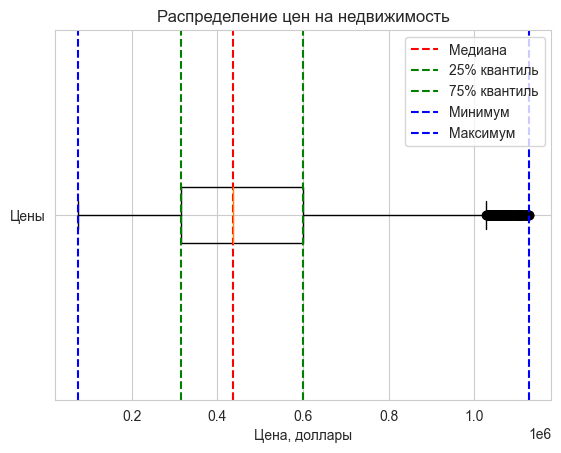

In [325]:
# фильтрация выбросов
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
data = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

# создание boxplot
fig, ax = plt.subplots()
ax.boxplot(data['price'], vert=False)

# добавление подписей
ax.set_title('Распределение цен на недвижимость')
ax.set_xlabel('Цена, доллары')
ax.set_yticklabels(['Цены'])

# добавление медианы, квантилей, минимума и максимума
median = data['price'].median()
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
minimum = data['price'].min()
maximum = data['price'].max()

ax.axvline(median, color='r', linestyle='--', label='Медиана')
ax.axvline(Q1, color='g', linestyle='--', label='25% квантиль')
ax.axvline(Q3, color='g', linestyle='--', label='75% квантиль')
ax.axvline(minimum, color='b', linestyle='--', label='Минимум')
ax.axvline(maximum, color='b', linestyle='--', label='Максимум')

# добавление легенды
ax.legend()

plt.show()




1.3. Изучите распределение квадратуры жилой


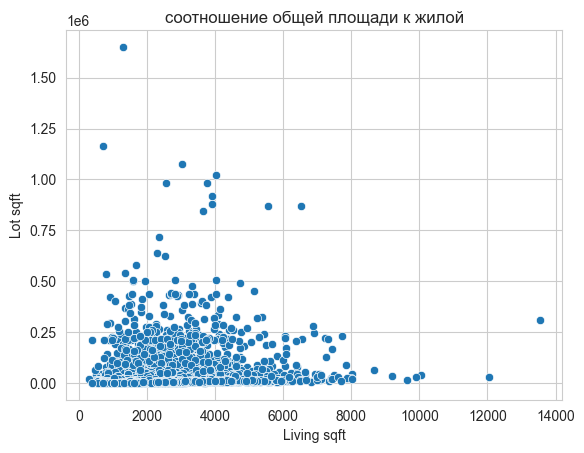

In [326]:
import seaborn as sns

sns.set_style("whitegrid")


sns.scatterplot(x='sqft_living', y='sqft_lot', data=df)


plt.title('соотношение общей площади к жилой')
plt.xlabel('Living sqft')
plt.ylabel('Lot sqft')


plt.show()

In [327]:
corr_matrix = df[['sqft_living', 'sqft_lot']].corr()
corr_matrix

,sqft_living,sqft_lot
sqft_living,1.00,0.17
sqft_lot,0.17,1.00


Мы видим, что зависимость очень слаба и на графике и в корреляции, поэтому сильно анализировать это не стоит

1.4. Изучите распределение года постройки

PS: не совсем поняла что такое распределение года построки, и приняла решение посмотреть какие года были самыми продуктивными

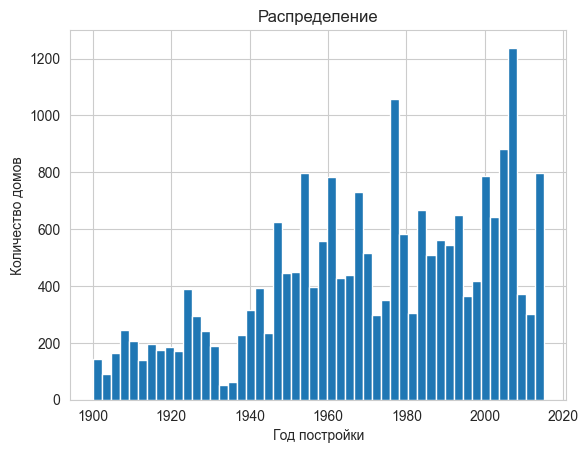

In [328]:
plt.hist(df['yr_built'], bins=50)

plt.title('Распределение')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')


plt.show()

Распределение на графике сложно назвать нормальным и сложно сказать в какие интервалы домов строилось больше суммарно, можно провести разделение на периоды

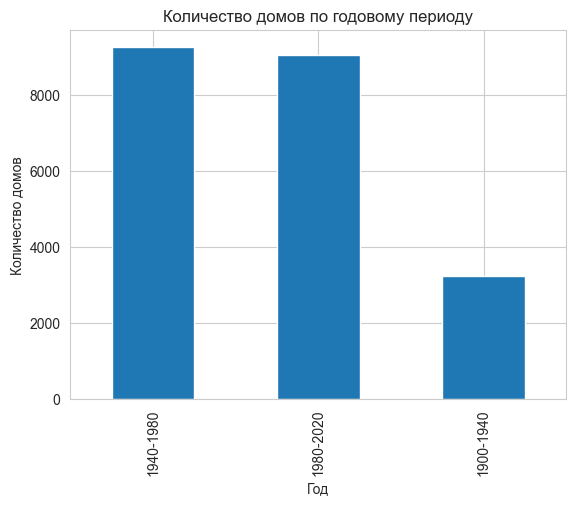

In [329]:
boundaries = [1900, 1940, 1980, 2020]
df['year_period'] = pd.cut(df['yr_built'], boundaries, labels=['1900-1940', '1940-1980', '1980-2020'])


df['year_period'].value_counts().plot(kind='bar')


plt.title('Количество домов по годовому периоду')
plt.xlabel('Год')
plt.ylabel('Количество домов')


plt.show()

теперь видно, что практически все дома были простроены начиная с 1940 года. суммарно 2 периода практически равны

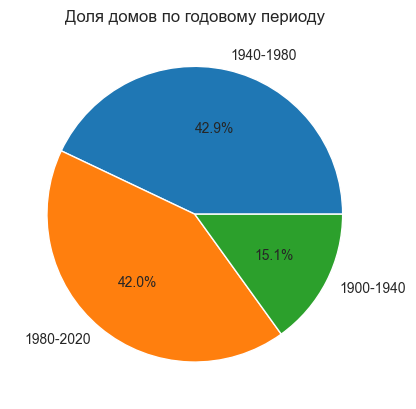

In [330]:
# создание круговой диаграммы
plt.pie(df['year_period'].value_counts(), labels=df['year_period'].value_counts().index, autopct='%1.1f%%')

# добавление заголовка
plt.title('Доля домов по годовому периоду')

# отображение круговой диаграммы
plt.show()


## Условие 2: 2 задача

2.1. Изучите распределение домов от наличия вида на набережную


In [331]:
bins = np.linspace(min(df["waterfront"]), max(df["waterfront"]), 3)
df["waterfront-binned"] = pd.cut(df["waterfront"], bins, labels=["No","Yes"], include_lowest=True)
df["waterfront-binned"].value_counts()

No     21450
Yes      163
Name: waterfront-binned, dtype: int64

In [332]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

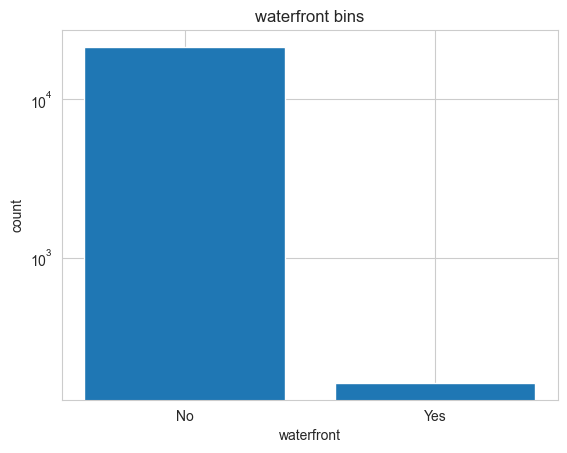

In [333]:
%matplotlib inline
import matplotlib.pyplot as plt
group_names = ['No', 'Yes']
counts = df["waterfront-binned"].value_counts()

plt.bar(group_names, counts)
plt.yscale('log')
plt.xlabel("waterfront")
plt.ylabel("count")
plt.title("waterfront bins")
plt.show()

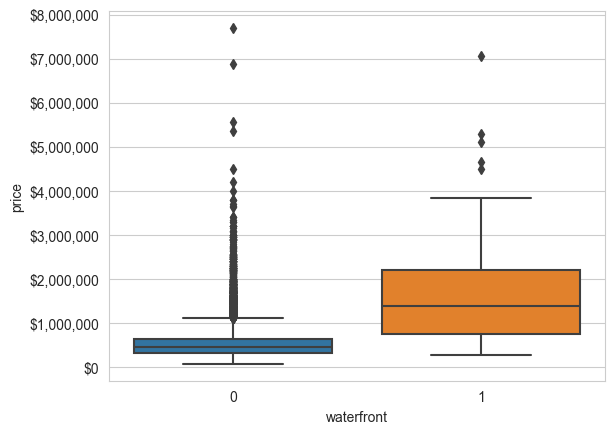

In [334]:
sns.set_style("whitegrid")


sns.boxplot(x='waterfront', y='price', data=df)


fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick)

# rotate Y-axis labels
plt.yticks(rotation=0)

# display plot
plt.show()

Мы видим, что в основном, диапазон цен домов с видом на море изначально выше, чем у домов без вида на море, медианная цена на дома у побережья выше максимальной, но мы анализируем дф с выбросами, на которые могут влиять различные параметры.
Выбросы могут значительно влиять на медиану и квантили, так как они являются статистическими мерами центральной тенденции и распределения данных соответственно.

Медиана - это значение, которое делит упорядоченный набор данных на две равные половины. Если в наборе данных есть выбросы, то они могут значительно сместить медиану в сторону выбросов. 

Квантили - это значения, которые делят упорядоченный набор данных на равные части. Например, медиана является вторым квартилем, который делит набор данных на две равные половины. Если в наборе данных есть выбросы, то они могут значительно сместить квантили в сторону выбросов. 

Таким образом, выбросы могут значительно искажать медиану и квантили, поэтому перед анализом данных необходимо убедиться в отсутствии выбросов или принять меры по их обработке. Попробуем изобразить те же ящики, но использовать данные без выбросов

In [335]:
# filtered_data - наш фильтрованный дф
filtered_data.head(1)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650


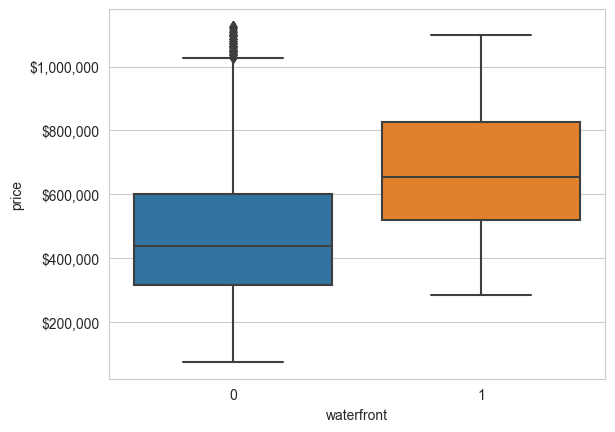

In [336]:
sns.set_style("whitegrid")


sns.boxplot(x='waterfront', y='price', data=filtered_data)


fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick)

# rotate Y-axis labels
plt.yticks(rotation=0)

# display plot
plt.show()

Опять же. среднестатистически начальные цены на дома с видом на море соответствуют начинаются с 25 квантиля иной категории домов, а медианные цены превышают 75 квантиль. Хотя, если убрать выбросы. на которые скорее всего влияют иные показатели, типа оценки недвижимости, метража и состояния то границы максимальных цен не сильно отличаются


2.2. Изучите распределение этажей домов






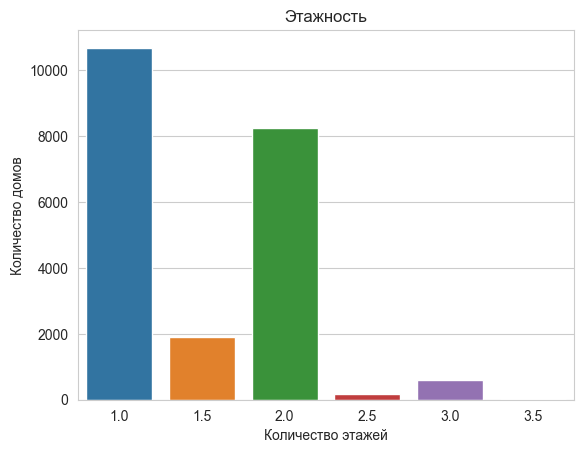

In [337]:
# Для решения этой задачи, нам необходимо группировать данные по этажам и посчитать сколько таких домов с помощью value count
count_floors = df['floors'].value_counts()
sns.barplot(x=count_floors.index, y=count_floors.values)
# добавляем подписи осей
plt.title("Этажность")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

В основном это одноэтажные и 2 этажные дома

Стало интересно как коррелируют параметры площади и этажности (так как дилые метры - самый коррелируемый с ценой параметр)

sqft_living - Кв. метры жилые

sqft_lot - Кв. метры общие

floors - Кол-во этажей

sqft_above - Кв. метры дома, которые находятся выше земли

sqft_basement - Кв. метры дома, которые находятся ниже земли

In [338]:
corr_matrix = df[['price','floors', 'sqft_living', 'sqft_above','sqft_basement', 'sqft_lot']].corr()
corr_matrix

,price,floors,sqft_living,sqft_above,sqft_basement,sqft_lot
price,1.00,0.26,0.70,0.61,0.32,0.09
floors,0.26,1.00,0.35,0.52,-0.25,-0.01
sqft_living,0.70,0.35,1.00,0.88,0.44,0.17
sqft_above,0.61,0.52,0.88,1.00,-0.05,0.18
sqft_basement,0.32,-0.25,0.44,-0.05,1.00,0.02
sqft_lot,0.09,-0.01,0.17,0.18,0.02,1.00


Исходя из таблицы, можно сделать следующие выводы:
- Цена (price) имеет сильную положительную корреляцию с жилой площадью (sqft_living) и площадью над уровнем земли (sqft_above).
- Цена (price) имеет слабую положительную корреляцию с количеством этажей (floors) и площадью под уровнем земли (sqft_basement).
- Цена (price) имеет очень слабую положительную корреляцию с площадью участка (sqft_lot).
- Количество этажей (floors) имеет слабую положительную корреляцию с площадью над уровнем земли (sqft_above) и жилой площадью (sqft_living).
- Жилая площадь (sqft_living) имеет сильную положительную корреляцию с площадью над уровнем земли (sqft_above) и слабую положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь над уровнем земли (sqft_above) имеет слабую положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь под уровнем земли (sqft_basement) имеет очень слабую положительную корреляцию с площадью участка (sqft_lot).

In [339]:
corr_matrix = df[['sqft_living', 'sqft_above','sqft_basement']].corr()
corr_matrix

,sqft_living,sqft_above,sqft_basement
sqft_living,1.00,0.88,0.44
sqft_above,0.88,1.00,-0.05
sqft_basement,0.44,-0.05,1.00


сходя из таблицы, можно сделать следующие выводы:
- Жилая площадь (sqft_living) имеет сильную положительную корреляцию с площадью над уровнем земли (sqft_above) и сильную положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь над уровнем земли (sqft_above) имеет слабую положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь под уровнем земли (sqft_basement) имеет сильную положительную корреляцию с жилой площадью (sqft_living) и сильную положительную корреляцию с площадью над уровнем земли (sqft_above).

Странная история о том, что чем больше метров под землей, тем больше жилых метров, хотя корреляция в 0.72 является умеренно сильной, но чем черт не шутит)

2.3. Изучите распределение состояния домов



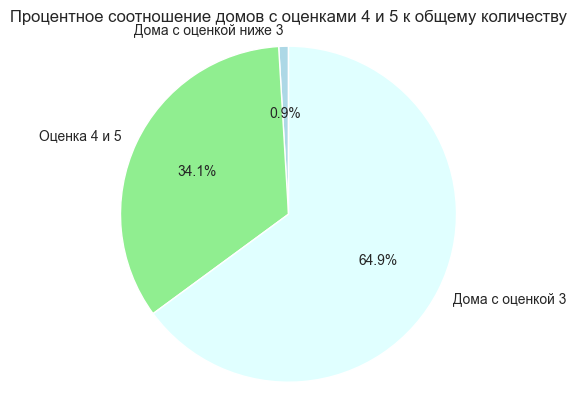

In [340]:
# Строим круговую диаграмму
labels = ['Дома с оценкой ниже 3', 'Оценка 4 и 5','Дома с оценкой 3']
sizes = [count_houses - (total_good_cond + med_condition), total_good_cond, med_condition ]
colors = ['lightblue', 'lightgreen', 'lightcyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Процентное соотношение домов с оценками 4 и 5 к общему количеству')
plt.show()

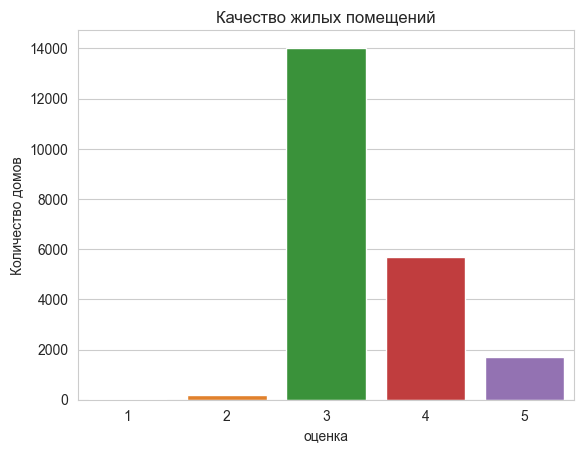

In [341]:
sns.barplot(x=count_condition.index, y=count_condition.values)

# добавляем подписи осей
plt.title("Качество жилых помещений")
plt.xlabel('оценка')
plt.ylabel('Количество домов')
plt.show()

In [342]:
df[['price', 'condition']].corr()

,price,condition
price,1.00,0.04
condition,0.04,1.00


Цена как ни странно никак не зависит от состояния дома

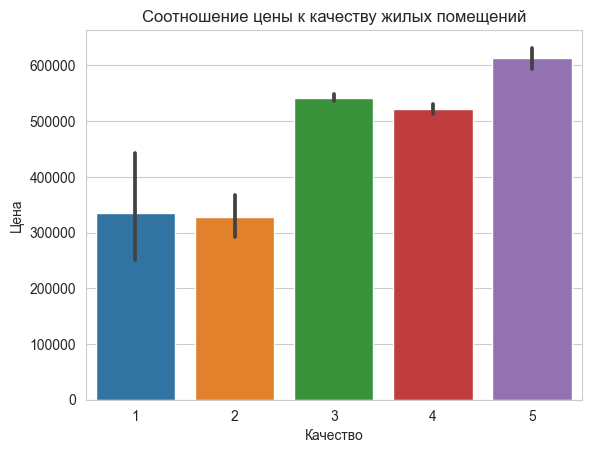

In [343]:
sns.barplot(x=df["condition"], y=df['price'])
# добавляем подписи осей
plt.title("Соотношение цены к качеству жилых помещений")
plt.xlabel('Качество')
plt.ylabel('Цена')
plt.show()

Диапазоны цен на дома с оценками 3 4 5 практически одинаковы, как и цены на дома с оценками 1 и 2 


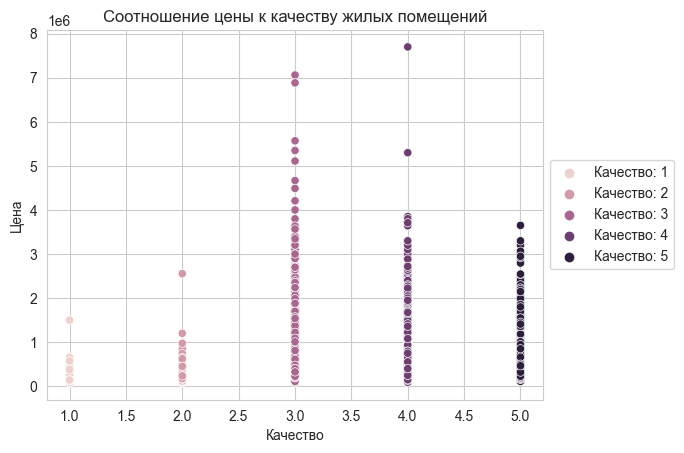

In [344]:
# построение точечной диаграммы
sns.scatterplot(x='condition', y='price', hue='condition', data=df)

# добавляем подписи осей
plt.title("Соотношение цены к качеству жилых помещений")
plt.xlabel('Качество')
plt.ylabel('Цена')

# добавляем легенду
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Качество: ' + str(label) for label in labels]
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# отображаем график
plt.show()

На этом графике видно, что цены на дома с оценкой 5 более равномерны и не имеют выбросов, а самые дорогие дома у нас как раз относятся к категориям 3 и 4
посмотрим зависимость оценки к качеству

In [345]:
df[['grade', 'condition']].corr()

,grade,condition
grade,1.00,-0.14
condition,-0.14,1.00


Эти параметры не связаны

In [346]:
# посмотрим от чего же в наибольшей степени зависит оценка
corr_matrix = df.corr()
price_corr = corr_matrix['grade'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7212/642148266.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


grade           1.00
sqft_living     0.76
sqft_above      0.76
sqft_living15   0.71
price           0.67
bathrooms       0.66
Name: grade, dtype: float64

Просмотрев матрицу, мы можем заметить, что умеренно сильная корреляция этго параметра с тем или иным видом площади помещения, вероятнее всего именно от этого параметра, в большей степени, зависит оценка этого помещения

## Условие 3: 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.


In [347]:
# посмотрим от чего же в наибольшей степени зависит оценка
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7212/347221212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.53
Name: price, dtype: float64

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

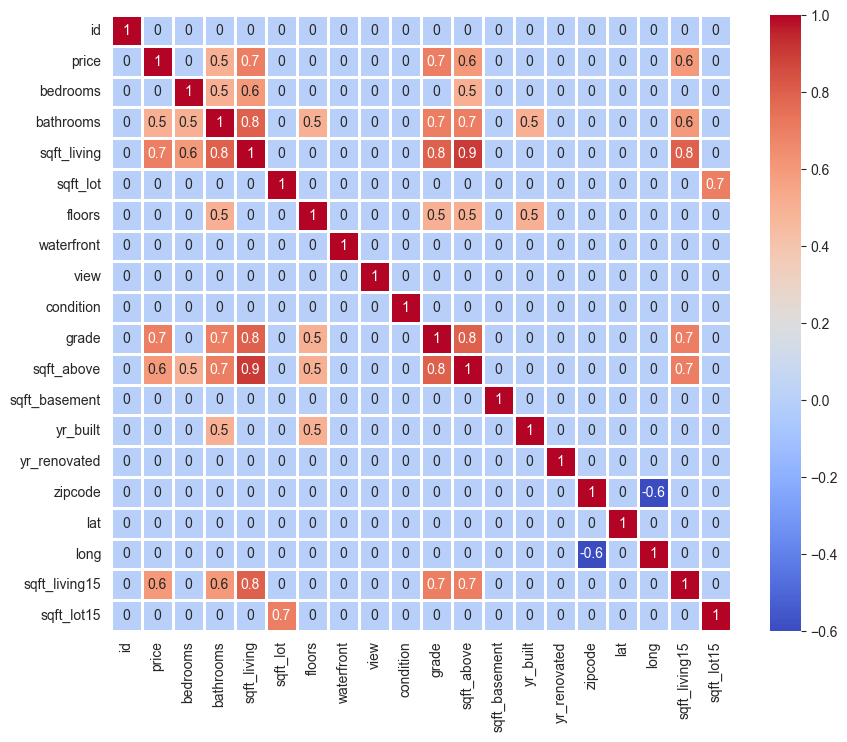

In [348]:
plt.figure(figsize=(10, 8))
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0
corr_matrix

sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm');

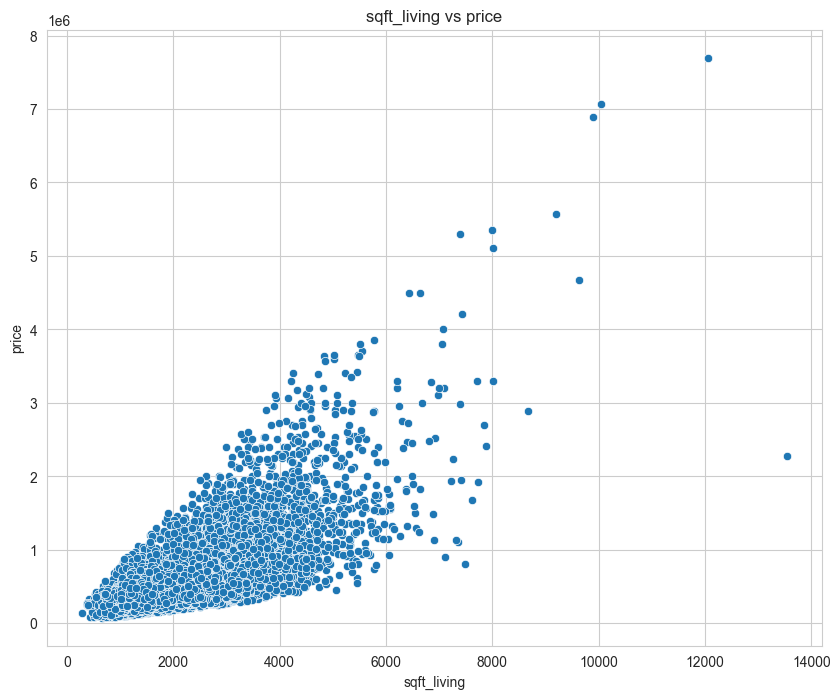

In [349]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


Параметр - жилая площадь. это самый коррелируемый с ценой параметр, так же от него зависит и оценка здания, в большей степени

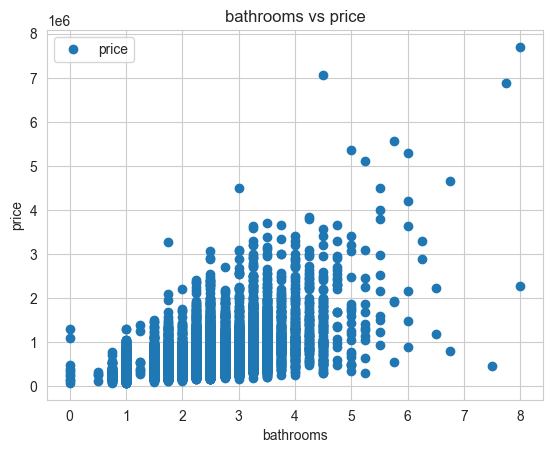

,bathrooms,price
bathrooms,1.00,0.53
price,0.53,1.00


In [350]:
df.plot(x='bathrooms', y='price', style='o')
plt.title('bathrooms vs price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()
df[['bathrooms','price']].corr()

Самые дорогие дома с большим количеством ванных комнат, а точнее наши дома, которые сильно отличаются по цене, но это не сильно коррелирует с ценой, так как мы можем наблюдать высокую стоимость у недвижимости и со средним количеством таких комнат

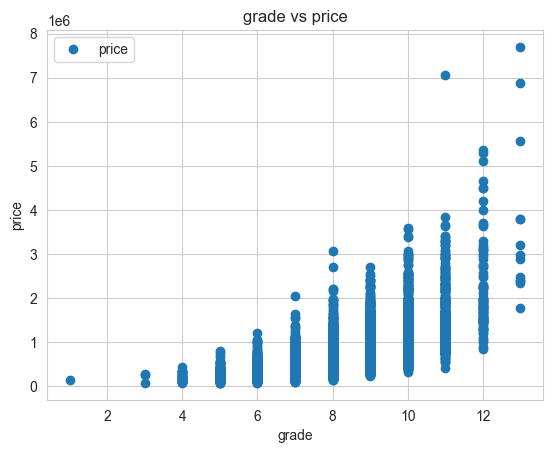

,grade,price
grade,1.00,0.67
price,0.67,1.00


In [351]:
df.plot(x='grade', y='price', style='o')

plt.title('grade vs price')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
df[['grade','price']].corr()

Попробуем посмотреть на датасет без выбросов

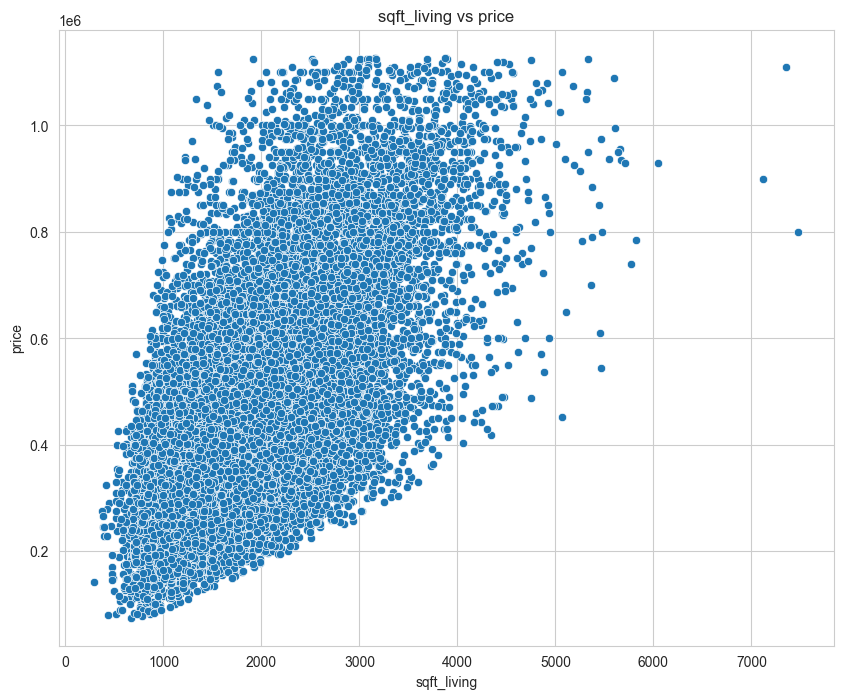

,sqft_living,price
sqft_living,1.00,0.62
price,0.62,1.00


In [352]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x='sqft_living', y='price', data=filtered_data)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()
filtered_data[['sqft_living','price']].corr()


C:\Users\admin\AppData\Local\Temp/ipykernel_7212/3580091490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtred_corr_matrix = filtered_data.corr()


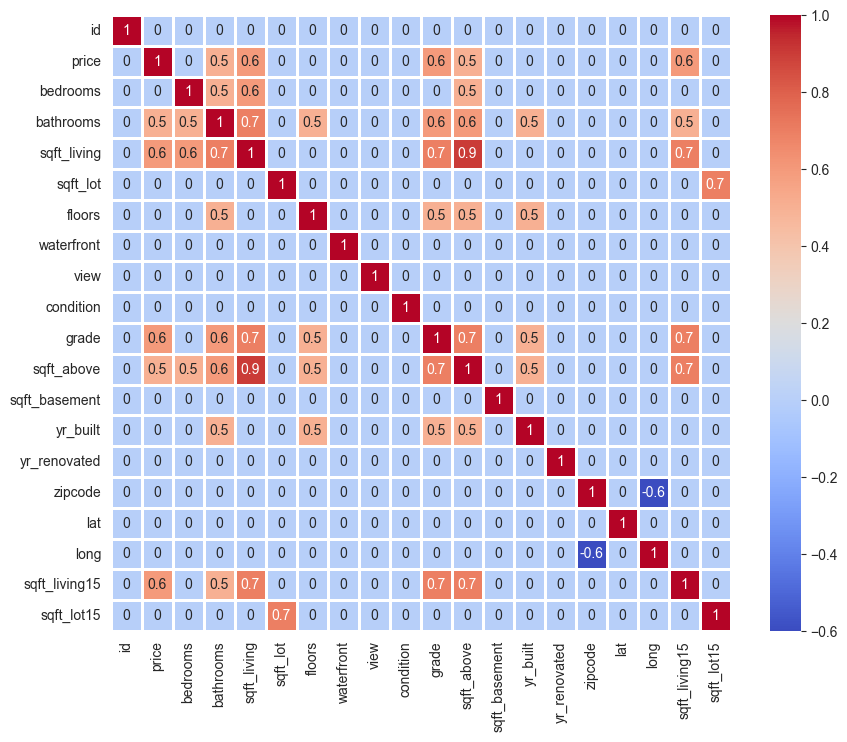

In [353]:
filtred_corr_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
filtred_corr_matrix = np.round(filtred_corr_matrix, 1)
filtred_corr_matrix[np.abs(filtred_corr_matrix) < 0.5] = 0
filtred_corr_matrix

sns.heatmap(filtred_corr_matrix, annot=True, linewidths=1, cmap='coolwarm');


In [354]:
# посмотрим от чего же в наибольшей степени зависит цена в отфильтрованном дф
price_corr_filtred = filtred_corr_matrix['price'].sort_values(ascending=False).head(5)
price_corr_filtred

price           1.00
grade           0.60
sqft_living15   0.60
sqft_living     0.60
bathrooms       0.50
Name: price, dtype: float64

In [355]:
import statsmodels.api as sm

X = df[['grade','sqft_living','sqft_above','bathrooms', 'condition']]
y = df['price']

# введем константу
X = sm.add_constant(X)

# обучим модель
model = sm.OLS(y, X).fit()

# выведем
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5328.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:34:53   Log-Likelihood:            -2.9892e+05
No. Observations:               21613   AIC:                         5.979e+05
Df Residuals:                   21607   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.691e+05   1.71e+04    -50.683      

Это результаты линейной регрессии, проведенной с помощью метода наименьших квадратов (OLS). Регрессия использует несколько независимых переменных (price, grade, sqft_living, sqft_living15, sqft_above, bathrooms) для предсказания зависимой переменной (price). 

В результате анализа получены следующие характеристики модели:

- R-квадрат (R-squared) - это мера того, насколько хорошо модель соответствует данным. Значение 1.000 означает, что модель идеально соответствует данным.
- Скорректированный R-квадрат (Adj. R-squared) - это R-квадрат, скорректированный на количество независимых переменных в модели. Значение 1.000 означает, что модель идеально соответствует данным, учитывая количество независимых переменных.
- F-статистика (F-statistic) - это мера того, насколько значима модель в целом. 
- AIC и BIC - это меры того, насколько хорошо модель соответствует данным, учитывая количество независимых переменных. Меньшие значения AIC и BIC указывают на лучшую модель. В данном случае, AIC и BIC имеют отрицательные значения, что указывает на то, что модель хорошо соответствует данным.
- Коэффициенты (coef) - это значения, которые показывают, как каждая независимая переменная влияет на зависимую переменную. 
- P-значения (P>|t|) - это мера того, насколько значим каждый коэффициент. Значения меньше 0,05 обычно считаются значимыми. Например, коэффициент для переменной price имеет P-значение равное 0.000, что означает, что он является значимым.

Наши показатели:
Коэффициент детерминации (R-squared) равен 0.55, что означает, что модель объясняет 55% дисперсии зависимой переменной. 

Коэффициенты регрессии для каждого из предикторов (grade, sqft_living, sqft_living15, sqft_above, bathrooms) также были оценены. 

Значения стандартных ошибок (std err) показывают, насколько точно были оценены коэффициенты регрессии. 

Значения t-статистики (t) и соответствующие p-значения (P>|t|) показывают, насколько значим каждый из предикторов. 

Значения 95% доверительного интервала (0.025 и 0.975) показывают, какие значения коэффициентов могут быть ожидаемы с 95% вероятностью. 

Также в выводах указаны замечания, которые могут указывать на проблемы в модели. Например, большое значение условного числа (condition number) может указывать на наличие мультиколлинеарности или других численных проблем.
Попробуем убрать взаимнокоррелирующие показатели из модели

In [356]:
from keplergl import KeplerGl
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
# Create a GeoDataFrame with a new column for the price category
gdf['price_category'] =pd.cut(gdf['price'], bins=[gdf['price'].min(), gdf['price'].quantile(0.5), gdf['price'].quantile(0.9), gdf['price'].max()], labels=['Least Expensive', 'Average Price', 'Most Expensive'])

# Create the map
map = KeplerGl(height=500)

# Add the data for each price category
map.add_data(gdf[gdf['price_category'] == 'Most Expensive'], name='Most Expensive')
map.add_data(gdf[gdf['price_category'] == 'Average Price'], name='Average Price')
map.add_data(gdf[gdf['price_category'] == 'Least Expensive'], name='Least Expensive')

# Set the color for each layer
map.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'id': 'Most Expensive',
                    'type': 'point',
                    'config': {
                        'color': 'red'
                    }
                },
                {
                    'id': 'Average Price',
                    'type': 'point',
                    'config': {
                        'color': 'yellow'
                    }
                },
                {
                    'id': 'Least Expensive',
                    'type': 'point',
                    'config': {
                        'color': 'green'
                    }
                }
            ]
        },
        'mapState': {
            'latitude': 47.6,
            'longitude': -122.3,
            'zoom': 10
        }
    }
}

# Save the map to an HTML file
map.save_to_html(file_name='./california.html')



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyter_client\session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Map saved to ./california.html!


Если просмотреть Данную карту, то цена зависит от места расположения домов, самые дорогие дома находятся на побережьях, около гор и водоемов. посмотрим на показатель вида. это категориальный показатель
для этого разобьем его на бины

In [357]:
# Create a new column for the view category
gdf['view_category'] = pd.cut(gdf['view'], bins=[0, 2, 3, 5], labels=['Bad', 'Average', 'Good'])

# Create the map
map = KeplerGl(height=500)

# Add the data for each view category
map.add_data(gdf[gdf['view_category'] == 'Good'], name='Good View')
map.add_data(gdf[gdf['view_category'] == 'Average'], name='Average View')
map.add_data(gdf[gdf['view_category'] == 'Bad'], name='Bad View')

# Set the color for each layer
map.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'id': 'Good View',
                    'type': 'point',
                    'config': {
                        'color': 'green'
                    }
                },
                {
                    'id': 'Average View',
                    'type': 'point',
                    'config': {
                        'color': 'yellow'
                    }
                },
                {
                    'id': 'Bad View',
                    'type': 'point',
                    'config': {
                        'color': 'red'
                    }
                }
            ]
        },
        'mapState': {
            'latitude': 47.6,
            'longitude': -122.3,
            'zoom': 10
        }
    }
}

# Save the map to an HTML file
map.save_to_html(file_name='./california_view.html')


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./california_view.html!


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyter_client\session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [358]:
df['long'].describe()

count   21613.00
mean     -122.21
std         0.14
min      -122.52
25%      -122.33
50%      -122.23
75%      -122.12
max      -121.31
Name: long, dtype: float64

In [359]:
df['lat'].describe()

count   21613.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64

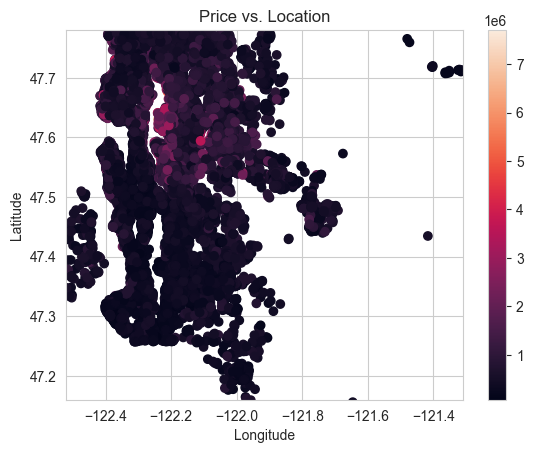

In [360]:

fig, ax = plt.subplots()
scatter = ax.scatter(gdf['long'], gdf['lat'], c=gdf['price'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Price vs. Location')
plt.colorbar(scatter, ax=ax)
ax.set_xlim(-122.52, -121.31)
ax.set_ylim(47.16, 47.78)
plt.show()


попробуем сделать модель регрессии для попытки предсказания цены исходя из наиболее коррелируемых параметров не объясняющих друг друга

sqft_living     0.70

sqft_above      0.61

bathrooms       0.51

## СТАТИСТИЧЕСКИЙ АНАЛИЗ КОРРЕЛИРУЕМЫХ С ЦЕНОЙ ПАРАМЕТРОВ

In [361]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value) )

AttributeError: 'Series' object has no attribute 'pearsonr'

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['view'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value) )

The Pearson Correlation Coefficient is 0.3972934882944908  with a P-value of P = 0.000000


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value) )

The Pearson Correlation Coefficient is 0.5251375054139638  with a P-value of P = 0.000000


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['sqft_above'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value) )

The Pearson Correlation Coefficient is 0.6055672983560784  with a P-value of P = 0.000000


Из результатов мы видим, что наиюбольшую корреляцию имеет Жилая площадь, но все переменные статистически важны. конечно цена складывается из множества факторов. Пропробуем разбить недвижимость на группы и провести дисперсионный анализ

In [ ]:
corr_df= df[['price','grade','sqft_living','sqft_above','bathrooms', 'condition']]

посмотрим на среднюю цену каждый группы метража

In [ ]:
grouped_sqft_living=corr_df[['sqft_living', 'price']].groupby(['sqft_living'],as_index= False).mean()

grouped_sqft_living

,sqft_living,price
0,290,142000.00
1,370,276000.00
2,380,245000.00
3,384,265000.00
4,390,236500.00
...,...,...
1033,9640,4668000.00
1034,9890,6885000.00
1035,10040,7062500.00
1036,12050,7700000.00


слишком много групп для анализа. попробуем разбить это на категории от минимума до 25% это небольшая площадь, от 25 до 50 - средняя и так далее, если мы обратимся снова к графикам, то увидим, что выбросы сильно влияют на результат описания, поэтому выбросам мы присвоим категорию extra

In [ ]:
df['sqft_living'].describe()

count   21613.00
mean     2079.90
std       918.44
min       290.00
25%      1427.00
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

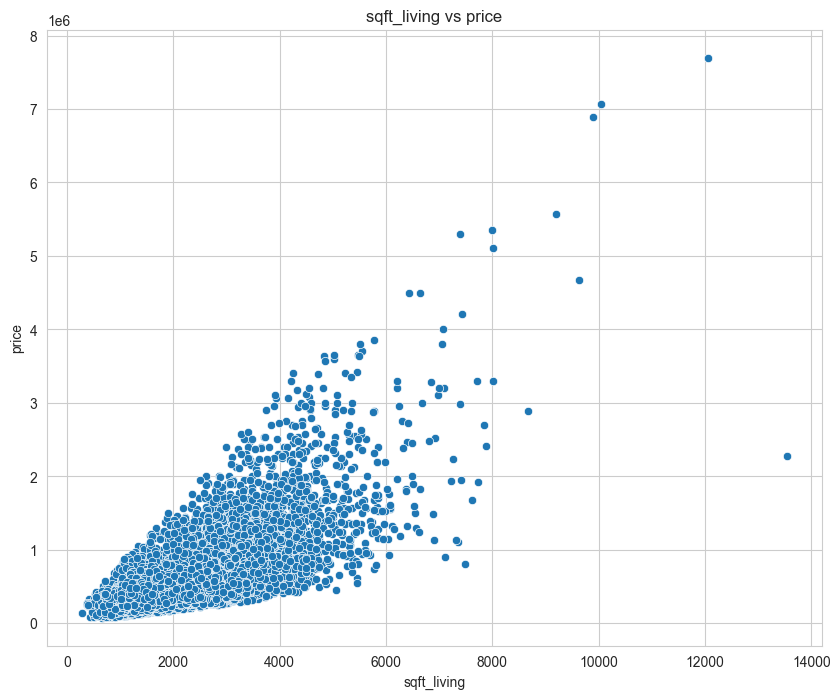

,sqft_living,price
sqft_living,1.00,0.62
price,0.62,1.00


In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()
filtered_data[['sqft_living','price']].corr()

In [ ]:
# Задаем границы интервалов для каждой категории
bins = [0, 2000, 4000, 6000, 14000]

# Создаем список меток для каждой категории
labels = ['low_sqft', 'medium_sqft', 'large_sqft','extra_sqft']

# Используем функцию pd.cut() для разделения данных на категории
df['sqft_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

# Выводим первые 5 строк датафрейма для проверки
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_period,waterfront-binned,sqft_category
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1955,0,98178,47.51,-122.26,1340,5650,1940-1980,No,low_sqft
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,1951,1991,98125,47.72,-122.32,1690,7639,1940-1980,No,medium_sqft
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,1933,0,98028,47.74,-122.23,2720,8062,1900-1940,No,low_sqft
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1965,0,98136,47.52,-122.39,1360,5000,1940-1980,No,low_sqft
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1987,0,98074,47.62,-122.05,1800,7503,1980-2020,No,low_sqft


In [ ]:
df['sqft_category'].value_counts()

KeyError: 'sqft_category'

In [ ]:
sns.boxplot(x="sqft_category", y="price", data=df)

ValueError: Could not interpret input 'sqft_category'

In [ ]:
grouped_category=df[['sqft_category', 'price']].groupby(['sqft_category'])
grouped_category.head(2)

KeyError: "['sqft_category'] not in index"

Если посмотреть на график зависимости цены от площади, то  мы заметим, что график рассеяния имеет форму конуса, возможно, мы можем  сгруппировать данные, а точнее разбить на интервалы метраж и посмотреть что влияет на цену в каждой категории

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_category.get_group('low_sqft')['price'], grouped_category.get_group('medium_sqft')['price'], grouped_category.get_group('large_sqft')['price'], grouped_category.get_group('extra_sqft')['price'])   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 5455.867802367909 , P = 0.0


F-значение 5455,867802367909 указывает на отношение дисперсии между группами к дисперсии внутри групп. Высокое значение F-значения говорит о том, что средние значения групп значительно отличаются друг от друга. P-значение 0,0 указывает на вероятность случайного получения такого большого F-значения. Низкое P-значение говорит о том, что различия между группами статистически значимы, и мы можем отвергнуть нулевую гипотезу о том, что средства групп равны. В данном случае P-значение очень мало (менее 0,05), что означает, что различия между группами высоко значимы.

# ЛИНЕЙНАЯ РЕГРЕССИЯ

In [ ]:
X = gdf[['lat', 'long', 'sqft_living']]
y = gdf['price']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)


[ 6.71970982e+05 -3.02800531e+05  2.86451659e+02]


In [ ]:
print(model.intercept_)

-69021110.51156552


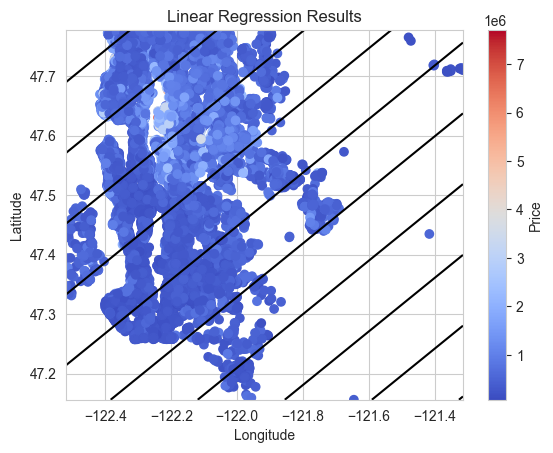

In [ ]:
# построение диаграммы рассеяния
plt.scatter(gdf['long'], gdf['lat'], c=gdf['price'], cmap='coolwarm')
plt.colorbar(label='Price')

# добавление линии регрессии
x = np.linspace(gdf['long'].min(), gdf['long'].max(), 100)
y = np.linspace(gdf['lat'].min(), gdf['lat'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = model.intercept_ + model.coef_[0]*Y + model.coef_[1]*X + model.coef_[2]*gdf['sqft_living'].mean()
plt.contour(X, Y, Z, levels=10, colors='black')

# настройка осей и заголовка
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Linear Regression Results')

# отображение графика
plt.show()

In [ ]:
# Создадим выборки относительно группы и проанализируем их, попробуем создать модели

In [ ]:
df_sqft_low = df.loc[df['sqft_category']=='low_sqft']
df_sqft_low
df_sqft_medium = df.loc[df['sqft_category']=='medium_sqft']
df_sqft_medium
df_sqft_large = df.loc[df['sqft_category']=='large_sqft']
df_sqft_large
df_sqft_extra = df.loc[df['sqft_category']=='extra_sqft']
df_sqft_extra

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_period,waterfront-binned,sqft_category
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1955,0,98178,47.51,-122.26,1340,5650,1940-1980,No,low_sqft
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,1933,0,98028,47.74,-122.23,2720,8062,1900-1940,No,low_sqft
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1965,0,98136,47.52,-122.39,1360,5000,1940-1980,No,low_sqft
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1987,0,98074,47.62,-122.05,1800,7503,1980-2020,No,low_sqft
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,1995,0,98003,47.31,-122.33,2238,6819,1980-2020,No,low_sqft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,20150219T000000,475000.00,3,2.50,1310,1294,2.00,0,0,...,2008,0,98116,47.58,-122.41,1330,1265,1980-2020,No,low_sqft
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,2009,0,98103,47.70,-122.35,1530,1509,1980-2020,No,low_sqft
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,2009,0,98144,47.59,-122.30,1020,2007,1980-2020,No,low_sqft
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,2004,0,98027,47.53,-122.07,1410,1287,1980-2020,No,low_sqft


In [ ]:
X_sqft_low = df_sqft_low[['sqft_living']]
y_sqft_low = df_sqft_low['price']

model_sqft_low = LinearRegression()
model_sqft_low.fit(X_sqft_low, y_sqft_low)
# наклон
model_sqft_low.coef_


array([145.6525783])

In [ ]:
# Значение цены, когда x = 0
model_sqft_low.intercept_

176565.0645624532

In [ ]:
Predicted_price_sqft_low = model_sqft_low.predict(X_sqft_low)
Predicted_price_sqft_low[0:5]   

array([348435.10695631, 288717.54985336, 462044.11803021, 421261.39610624,
       426359.23634674])

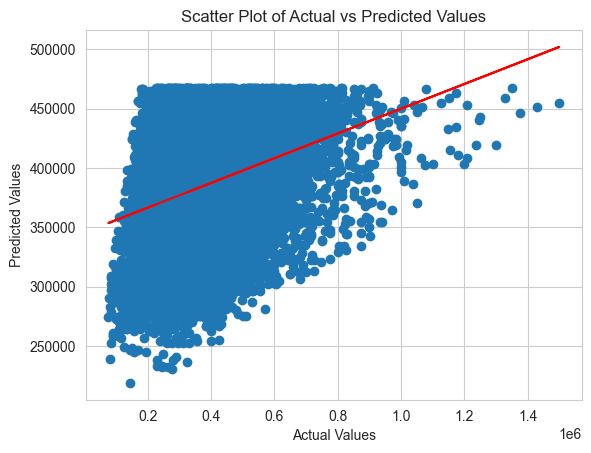

In [ ]:

y_actual = df_sqft_low['price']

# predicted values
y_predicted = Predicted_price_sqft_low

# plot scatter plot
plt.scatter(y_actual, y_predicted)

# add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')

# add regression line
slope, intercept = np.polyfit(y_actual, y_predicted, 1)
plt.plot(y_actual, slope*y_actual + intercept, color='red')

# show plot
plt.show()

Выглядит отвратительно... значения слишклм разбросаны...

In [ ]:
r2 = r2_score(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
mae = mean_absolute_error(y_actual, y_predicted)
print('R-squared for sqft_living VS price:', r2)
print('MSE:', mse)
print('MAE:', mae)

R-squared for sqft_living VS price: 0.10422846765009686
MSE: 21770942794.968296
MAE: 116228.56541823447




Значение R-квадрат 0,10422846765009686 показывает, что только 10,4% дисперсии в `цене` может быть объяснено характеристикой `sqft_living`. Это означает, что модель не очень хорошо подходит для данных, и, скорее всего, существуют другие факторы, влияющие на `цену` дома, а точнее...все.

Значение MSE (средняя квадратичная ошибка) 21770942794.968296 указывает, d данном случае MSE довольно высок, что означает, что модель не очень точно предсказывает значения `цен`.

Значение MAE (средняя абсолютная ошибка) 116228.56541823447 указывает на среднюю абсолютную разницу между предсказанными значениями `цен` и фактическими значениями `цен` в наборе данных. Более низкое значение MAE указывает на лучшую производительность модели. В данном случае MAE довольно высок, что означает, что модель не очень точно предсказывает значения `цен`.

# Мультилинейная регрессия

In [ ]:
# сформируем фрейм из параметров, необходимых для добавления в модель
corr_df_low =df_sqft_low[['bedrooms','sqft_above','bathrooms']]
# скорректируем модель по этим параметрам
model_sqft_low.fit(corr_df_low, df_sqft_low['price'])


LinearRegression()

In [ ]:
model_sqft_low.intercept_ 

248492.44733396207

In [ ]:
model_sqft_low.coef_

array([-3418.2416428 ,    70.20738968, 33764.39400718])

In [ ]:
Price_multy = model_sqft_low.intercept_ + model_sqft_low.coef_[0] * df_sqft_low['bedrooms'] 
+ model_sqft_low.coef_[1] * df_sqft_low['sqft_above'] + model_sqft_low.coef_[2] * df_sqft_low['bathrooms']
Price_multy 

0       238237.72
2       241655.96
3       234819.48
4       238237.72
6       238237.72
           ...   
21607   238237.72
21608   238237.72
21610   241655.96
21611   238237.72
21612   241655.96
Name: bedrooms, Length: 11712, dtype: float64

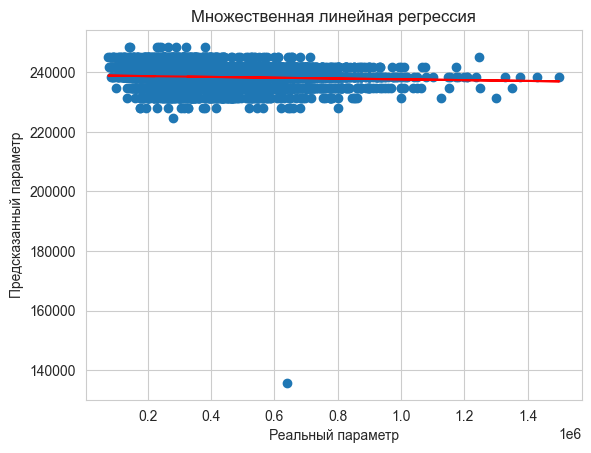

In [ ]:
# предсказанный параметр

predicted = Price_multy
# реальный параметр
real = df_sqft_low['price']

# создаем график
plt.scatter(real, predicted)

# добавляем заголовок и подписи осей
plt.title('Множественная линейная регрессия')
plt.xlabel('Реальный параметр')
plt.ylabel('Предсказанный параметр')
# add regression line
slope, intercept = np.polyfit(real, predicted, 1)
plt.plot(real, slope*real + intercept, color='red')

# выводим график на экран
plt.show()

Дело плохо. предсказать цену на недвижимость почти невозможно с помощью этих параметров, хотя они имеют высокую корреляцию с ценой.

In [ ]:
r2 = r2_score(real, predicted)
mse = mean_squared_error(real, predicted)
mae = mean_absolute_error(real, predicted)
print('R-squared :', r2)
print('MSE:', mse)
print('MAE:', mae)

R-squared : -0.8986633972786866
MSE: 46145351483.33788
MAE: 160713.25061898812


Отрицательное значение R-квадрат указывает на то, что модель плохо подходит для данных. R-квадрат - это статистическая мера, которая представляет собой долю дисперсии зависимой переменной, которая объясняется независимыми переменными в модели. Отрицательное значение R-квадрат означает, что модель не объясняет дисперсию зависимой переменной и даже может работать хуже, чем модель, которая просто предсказывает среднее значение зависимой переменной.

MSE (средняя квадратичная ошибка) - это мера средней квадратичной разницы между прогнозируемыми и фактическими значениями зависимой переменной. Более высокое значение MSE указывает на то, что модель менее точна в прогнозировании зависимой переменной.

MAE (средняя абсолютная ошибка) - это показатель средней абсолютной разницы между предсказанными и фактическими значениями зависимой переменной. Более высокое значение MAE указывает на то, что модель менее точна в прогнозировании зависимой переменной.

(0.0, 1571250.0)

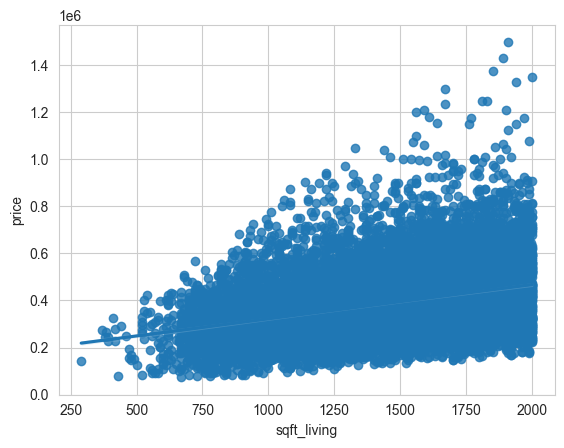

In [ ]:
sns.regplot(x="sqft_living", y="price", data=df_sqft_low)
plt.ylim(0, )